In [60]:
#installs
!pip install xlrd
!pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [61]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv

In [62]:
#methods
def read_oscilloscope_csv_data3(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  fid = open(filename,'r')
  lines = fid.readlines()
  fid.close()

  t = np.linspace(0,0,len(lines)-19)
  ch1 = t.copy()
  ch2 = t.copy()
  for n in range(16,len(lines)-3):
    line = lines[n].split(',')
    t[n-16] = np.float64(line[0])
    ch1[n-16] = np.float64(line[1])
    ch2[n-16] = np.float64(line[3])
  return t,ch1,ch2
def read_oscilloscope_csv_data2(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  fid = open(filename,'r')
  lines = fid.readlines()
  fid.close()
  line1 = lines[0].split(',')

  t = np.linspace(0,0,len(lines)-2)
  ch1 = t.copy()
  ch2 = t.copy()
  for n in range(1,len(lines)-5):
    line = lines[n].split(',')
    t[n-1] = np.float64(line[0])
    ch1[n-1] = np.float64(line[1])
    ch2[n-1] = np.float64(line[2])
  return t,ch1,ch2

def read_oscilloscope_csv_data(filename):
  # This function can be used to read the data saved from the oscilloscope.
  # It might be necessary to adapt it to the actual file format that the used
  # oscilloscope outputs.
  # function's inputs
  # - filename -> the name of the file containing the data
  # function's outputs
  # - t -> vector containing the sampling time points
  # - ch1 -> vector containing the voltage values measured on CH1
  # - ch2 -> vector containing the voltage values measured on CH2
  fid = open(filename,'r')
  lines = fid.readlines()
  fid.close()
  line1 = lines[0].split(',')

  t = np.linspace(0,0,len(lines)-2)
  ch1 = t.copy()
  ch2 = t.copy()
  for n in range(1,len(lines)-5):
    line = lines[n].split(',')
    t[n-1] = np.float64(line[0])
    ch1[n-1] = np.float64(line[1])
    ch2[n-1] = np.float64(line[3])
  return t,ch1,ch2

def sinusfunct(x, a, b, phi, c):
    return (a*np.sin(2*np.pi*b*x+phi) +c)

def ekeltan(x, a):
    return np.arctan(2*a*x/(1-np.power(x,2)))-np.pi

def ekeltan2(x, a):
    return np.arctan(2*a*x/(1-np.power(x,2)))

def logreg(x, a, b, c):
  return a/(1+b*np.exp(c*x))

def quadradic(x, a, b, c):
  return a*np.power(x,2) + b*x + c

def line(x, a, b):
  return a*x + b

def schwingungDämpf(x, a, b, phi, c, d):
  return (np.exp(-d*x)*a*np.sin(2*np.pi*b*x+phi) +c)

def quatschfunktion(x, a, d):
  return a/(np.sqrt(np.power(1-np.power(x,2),2)+4*d*np.power(x,2)))

def daten_fitten(funct, x_data, y_data, genauigkeit, p): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min(x_data), max(x_data), genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

In [63]:
beta = 0.16866207

In [64]:
#read
[t_T00E, ch1_T00E, peak_T00E] = read_oscilloscope_csv_data2('T0000E.CSV')
[t_T01E, ch1_T01E, peak_T01E] = read_oscilloscope_csv_data2('T0001E.CSV')
[t_T02E, ch1_T02E, peak_T02E] = read_oscilloscope_csv_data2('T0002E.CSV')
[t_T03E, ch1_T03E, peak_T03E] = read_oscilloscope_csv_data2('T0003E.CSV')

[t_T1f, ch1_T1f, peak_T1f] = read_oscilloscope_csv_data2('T1frei.CSV')
[t_T2f, ch1_T2f, peak_T2f] = read_oscilloscope_csv_data2('T2frei.CSV')


Fitparameter
[0.215357   0.85717333 0.33595974 0.00087973]
zugehörige Uncertainty
[1.25747887e-05 1.59146751e-06 5.80591427e-05 8.86713242e-06]


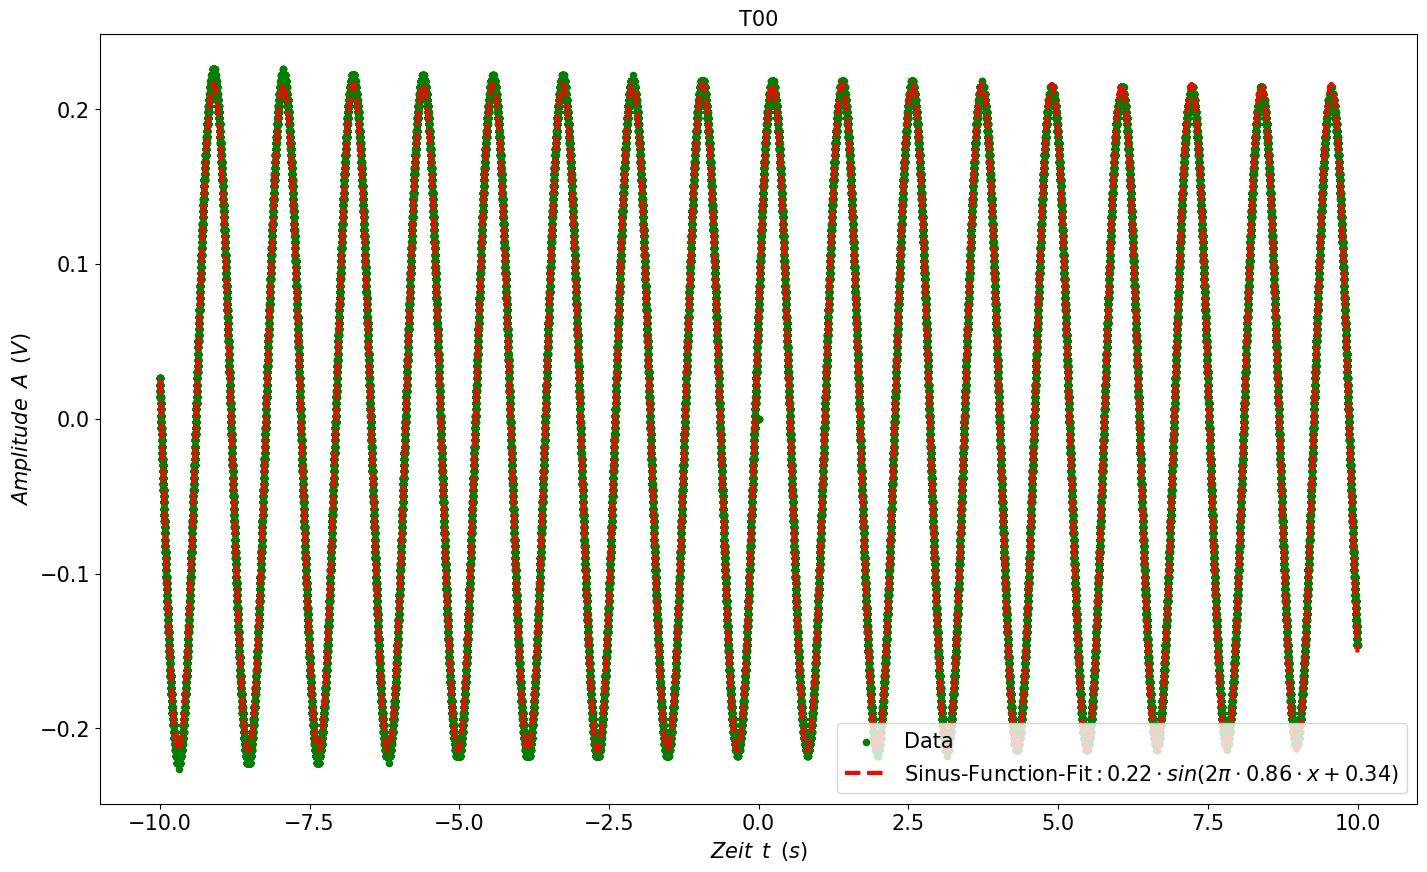

Fitparameter
[1.27889543e-01 8.57249919e-01 5.83637896e-01 7.47547840e-04]
zugehörige Uncertainty
[8.79751749e-06 1.88577106e-06 6.85935873e-05 6.21331996e-06]


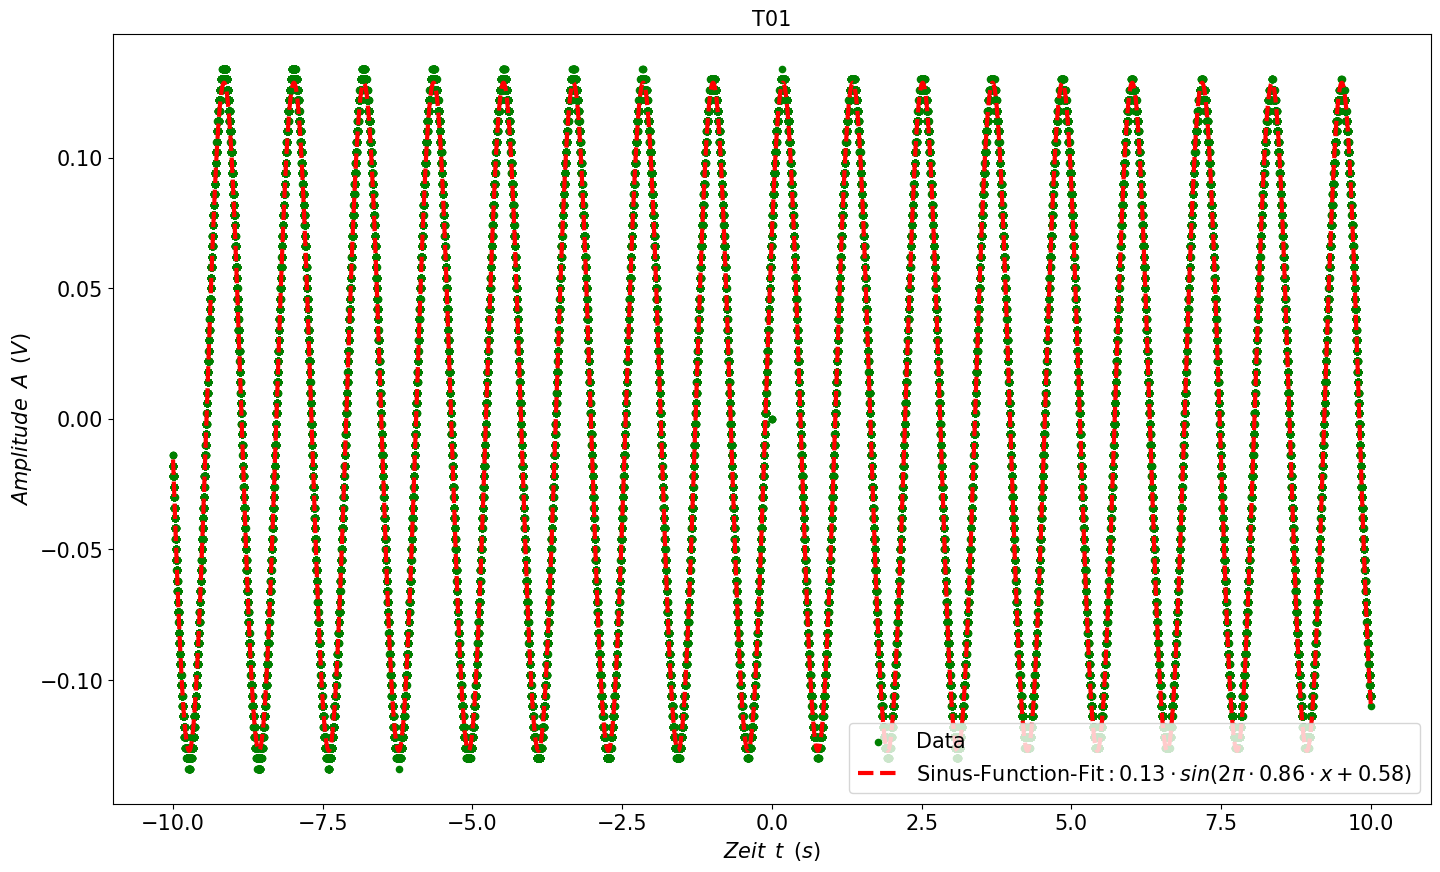

Fitparameter
[ 1.65352470e-01  8.57204520e-01  4.35737542e-01 -6.21896006e-05]
zugehörige Uncertainty
[1.03888969e-05 1.71593248e-06 6.25350992e-05 7.32978335e-06]


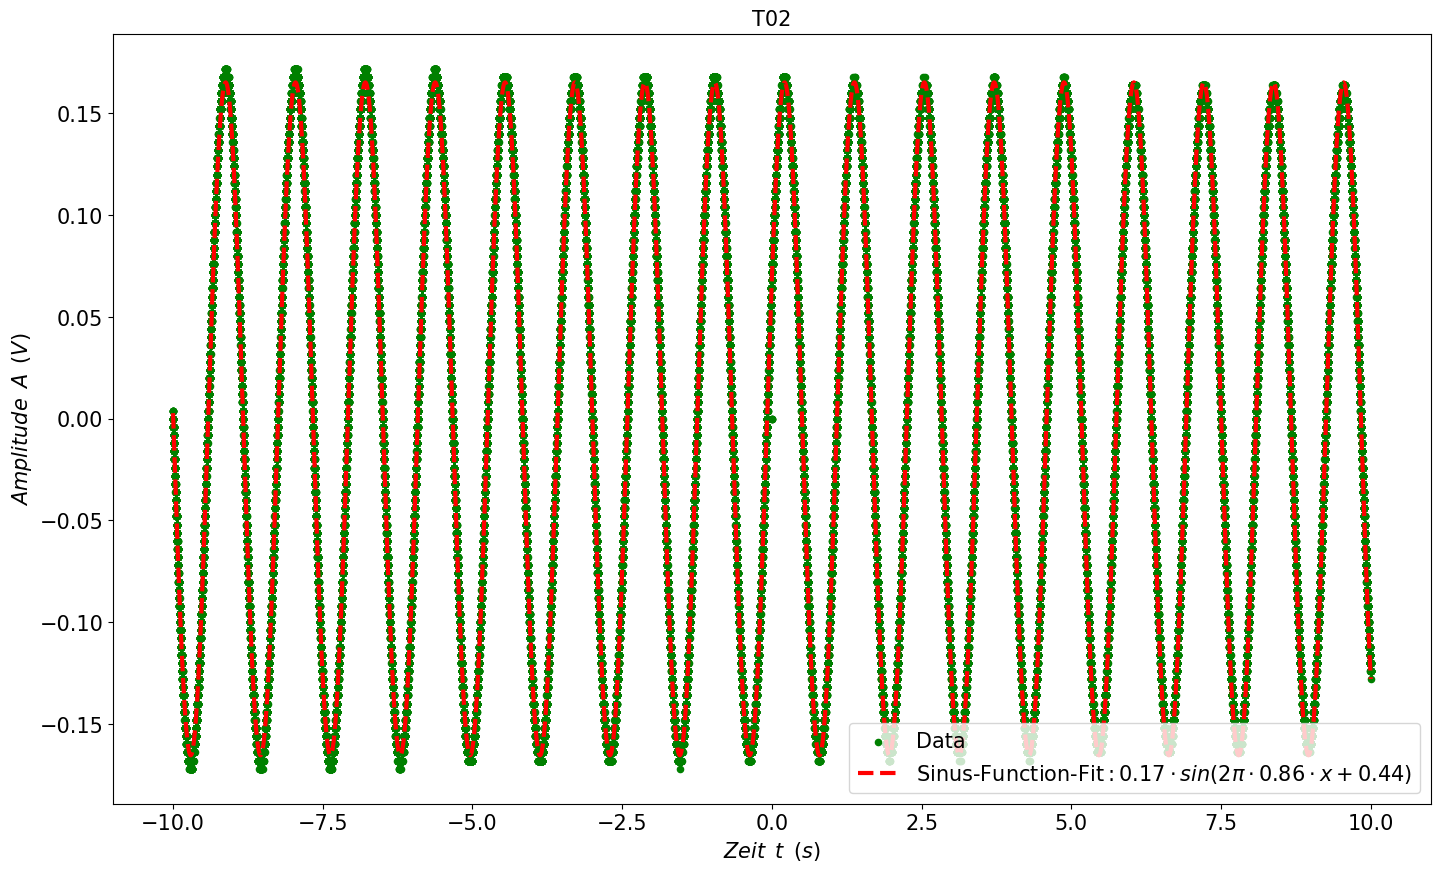

Fitparameter
[ 1.65352470e-01  8.57204520e-01  4.35737542e-01 -6.21896006e-05]
zugehörige Uncertainty
[1.03888969e-05 1.71593248e-06 6.25350992e-05 7.32978335e-06]


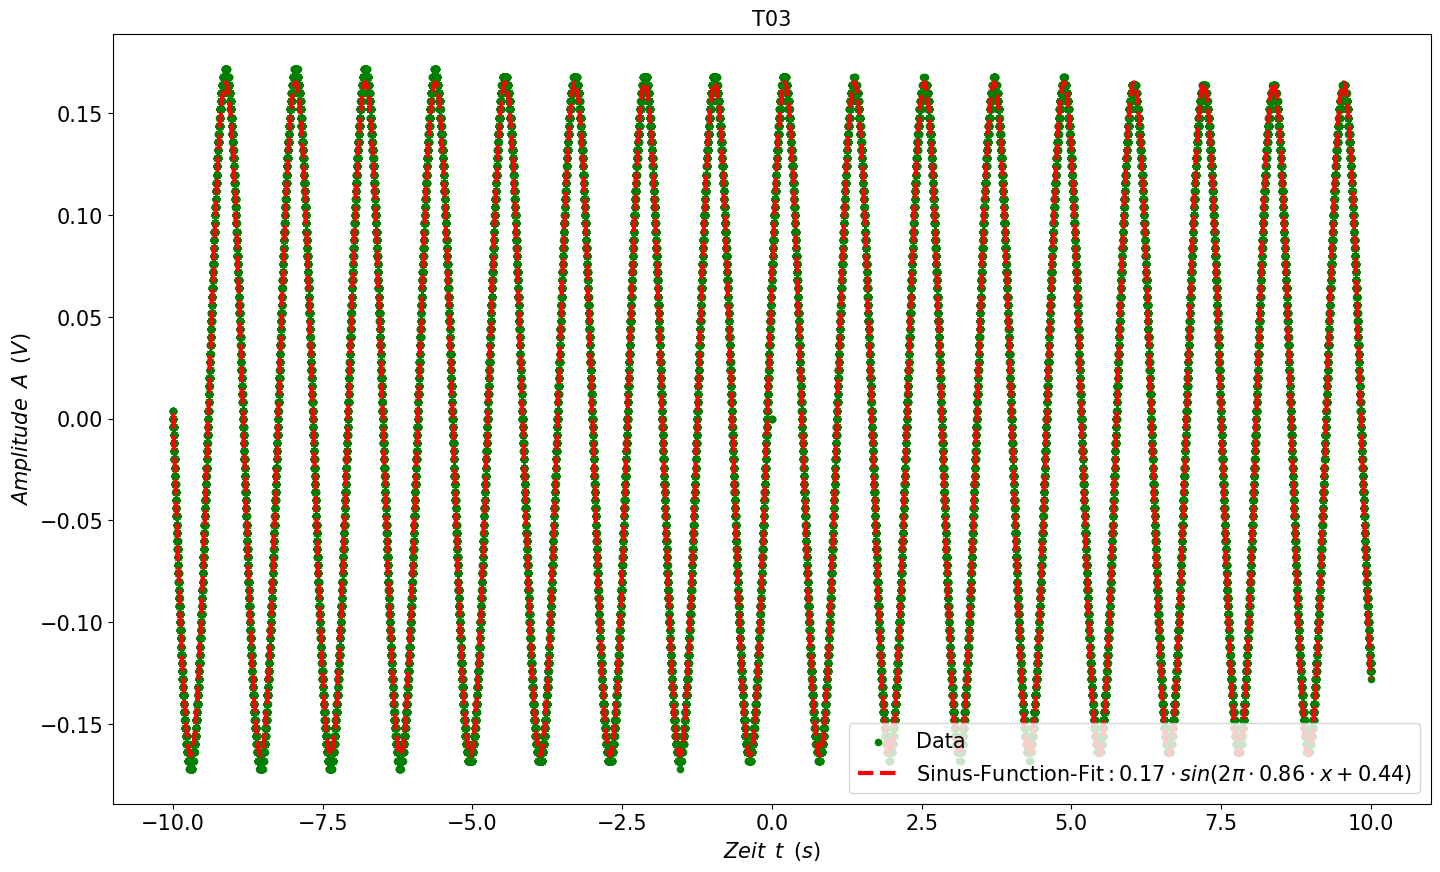

In [65]:
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T00E, ch1_T00E, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T00E, ch1_T00E, 100000, [1, 0.9, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin(2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('T00', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f1 = ufloat(pars[1], stdevs[1])

plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T01E, ch1_T01E, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T01E, ch1_T01E, 100000, [1, 0.9, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('T01', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f2 = ufloat(pars[1], stdevs[1])

plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T02E, ch1_T02E, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T02E, ch1_T02E, 100000, [1, 0.9, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot  %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('T02', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f3 = ufloat(pars[1], stdevs[1])

plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T03E, ch1_T03E, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T03E, ch1_T03E, 100000, [1, 0.9, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('T03', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f4 = ufloat(pars[1], stdevs[1])


In [66]:
frequencies = np.array([f1,f2,f3,f4])
freq_nom = np.array([f1.nominal_value, f2.nominal_value, f3.nominal_value, f4.nominal_value])
mean = np.mean(frequencies)
std = np.std(freq_nom)
print(mean)
print(std)
f0 = ufloat(mean.nominal_value, std)
print(f0)
T0 = 1/f0
print(T0)
omega0 = 2*np.pi*f0
print(omega0)

0.8572081+/-0.0000009
2.730987141975529e-05
0.857208+/-0.000027
1.16658+/-0.00004
5.38600+/-0.00017


Fitparameter
[ 0.06939486  0.85162687 -0.29012825 -0.00372012  0.16866207]
zugehörige Uncertainty
[1.33830832e-04 3.96201926e-05 1.91345687e-03 7.41632803e-05
 2.55353593e-04]


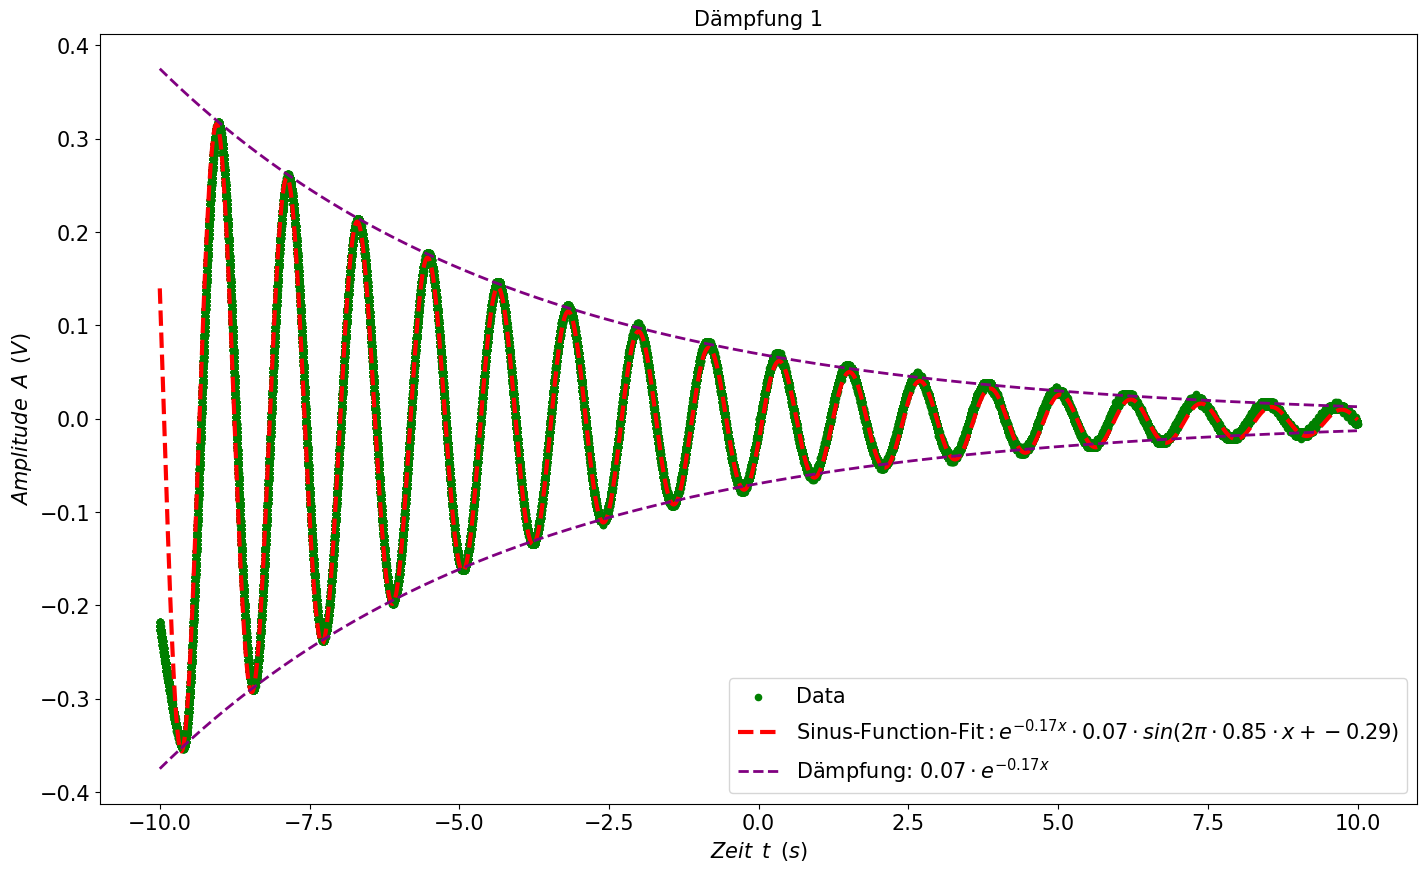

Fitparameter
[-1.32964792e-02  8.41333344e-01  2.87866055e+00 -1.70388884e-03
  8.63514202e-01]
zugehörige Uncertainty
[1.15703095e-05 4.34905502e-05 9.22796337e-04 1.12157247e-05
 2.48130326e-04]


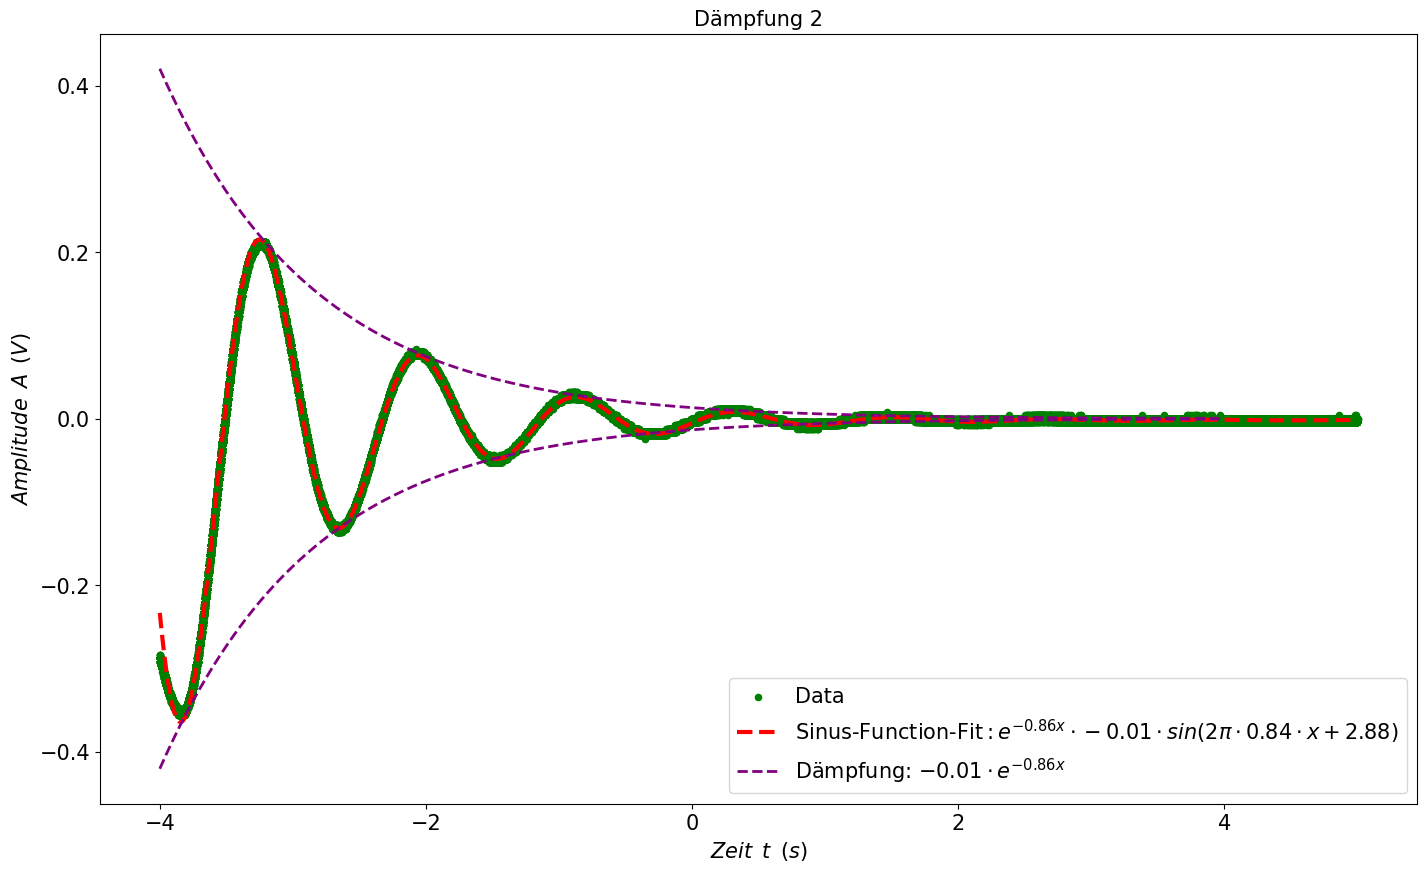

0.16866+/-0.00026
0.85163+/-0.00004 0.84133+/-0.00004


In [67]:
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T1f, ch1_T1f, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(schwingungDämpf, t_T1f, ch1_T1f, 100000, [1, 0.9, 1, 1, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: e^{- %.2f x} \cdot %.2f \cdot sin(2\pi\cdot  %.2f \cdot x + %.2f)$' %(pars[4], pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

x = np.arange(-10, 10, 0.01)
f = pars[0]*np.exp(-pars[4]*x)
plt.plot(x, f, '--', color='purple', label = r'Dämpfung: $%.2f \cdot e^{- %.2f x}$' %(pars[0],pars[4]), zorder= 6, linewidth=2)
f = -pars[0]*np.exp(-pars[4]*x)
plt.plot(x, f, '--', color='purple', zorder= 6, linewidth=2)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('Dämpfung 1', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f1 = ufloat(pars[1], stdevs[1])
d1 = ufloat(pars[4], stdevs[4])

t_T2f = t_T2f[12500:]
ch1_T2f = ch1_T2f[12500:]

plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T2f, ch1_T2f, label = 'Data', color='green', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(schwingungDämpf, t_T2f, ch1_T2f, 100000, [1, 0.8, 1, 0, 1])
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: e^{- %.2f x} \cdot %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[4], pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

x = np.arange(-4, 4, 0.01)
f = pars[0]*np.exp(-pars[4]*x)
plt.plot(x, f, '--', color='purple', label = r'Dämpfung: $%.2f \cdot e^{- %.2f x}$' %(pars[0],pars[4]), zorder= 6, linewidth=2)
f = -pars[0]*np.exp(-pars[4]*x)
plt.plot(x, f, '--', color='purple', zorder= 6,linewidth=2)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('Dämpfung 2', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.show()
f2 = ufloat(pars[1], stdevs[1])
d2 = ufloat(pars[4], stdevs[4])
print(d1)
print(f1,f2)

In [68]:
print('f1:',f1)
T1 = 1/f1
print('T1:',T1)
omega1 = 2*np.pi*f1
print('omega1:',omega1)
d_koff1 = d1/omega0
print('d_koff1:',d_koff1)
print('neuomega1:', unp.sqrt(np.power(omega0,2)-np.power(d1,2)))
print('f2:',f2)
T2 = 1/f2
print('T2:',T2)
omega2 = 2*np.pi*f2
print('omega2:',omega2)
d_koff2 = d2/omega0
print('d_koff2:',d_koff2)
print('neuomega2:', unp.sqrt(np.power(omega0,2)-np.power(d2,2)))

f1: 0.85163+/-0.00004
T1: 1.17422+/-0.00005
omega1: 5.35093+/-0.00025
d_koff1: 0.03131+/-0.00005
neuomega1: 5.38336+/-0.00017
f2: 0.84133+/-0.00004
T2: 1.18859+/-0.00006
omega2: 5.28625+/-0.00027
d_koff2: 0.16033+/-0.00005
neuomega2: 5.31632+/-0.00018


T01 bei f = 0,88Hz
Fitparameter
[ 0.10930072  0.883013    0.73646895 -0.00216339]
zugehörige Uncertainty
[6.59433234e-06 1.66582135e-06 6.03821464e-05 4.66570111e-06]
Fitparameter
[-0.50397762  0.88300588  1.43100184  0.01271478]
zugehörige Uncertainty
[6.33662753e-05 3.41592232e-06 1.24789583e-04 4.46527731e-05]


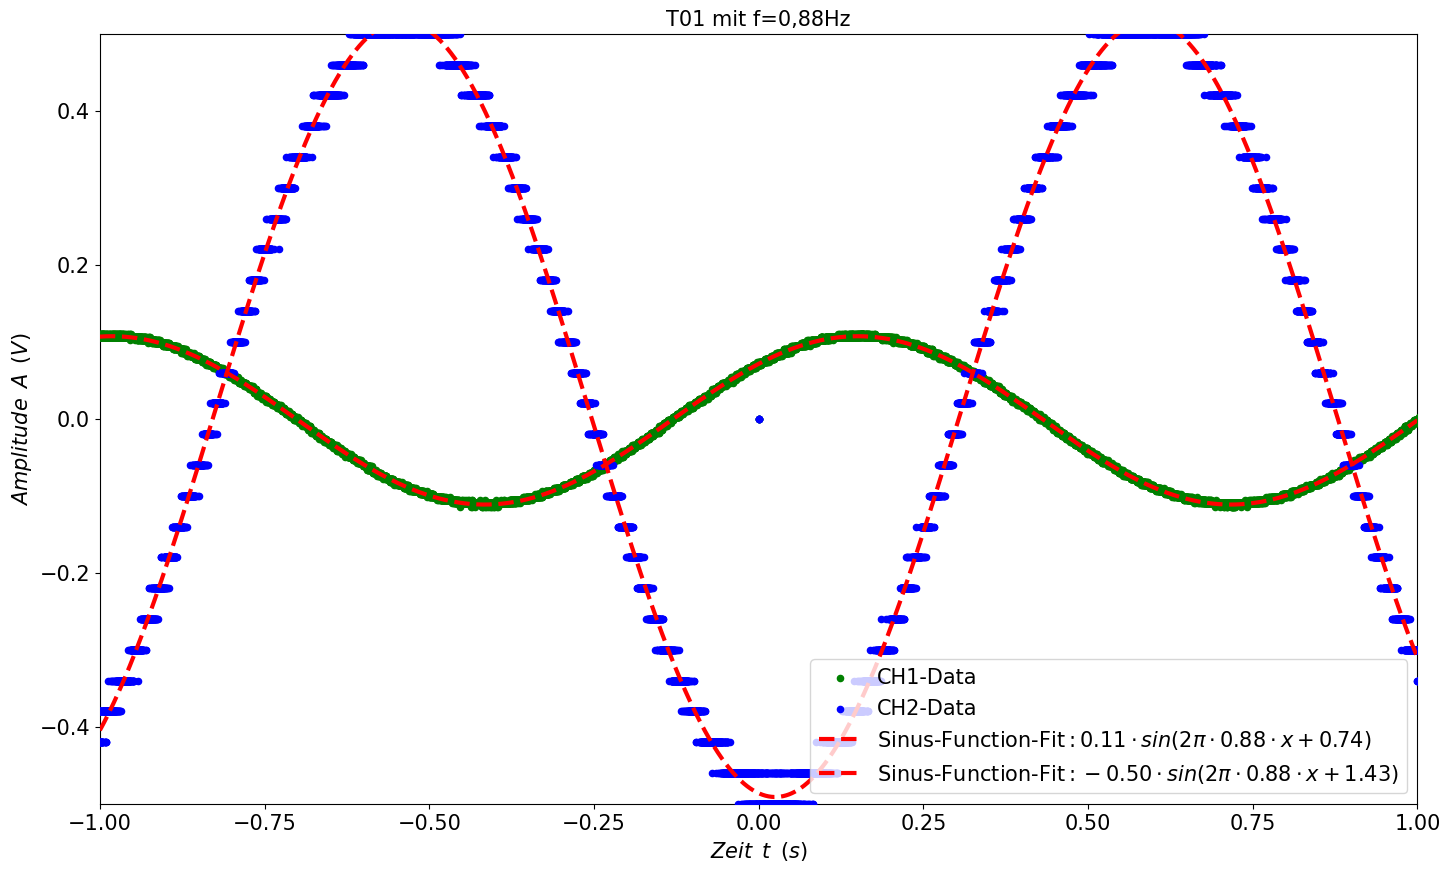

T02
Fitparameter
[ 0.07041393  0.9080117   1.84251658 -0.00255045]
zugehörige Uncertainty
[6.54448022e-06 2.59700544e-06 9.35299695e-05 4.64529729e-06]
Fitparameter
[0.50341069 0.90800784 5.47688805 0.01202317]
zugehörige Uncertainty
[6.25435594e-05 3.42851126e-06 1.24285814e-04 4.42489069e-05]


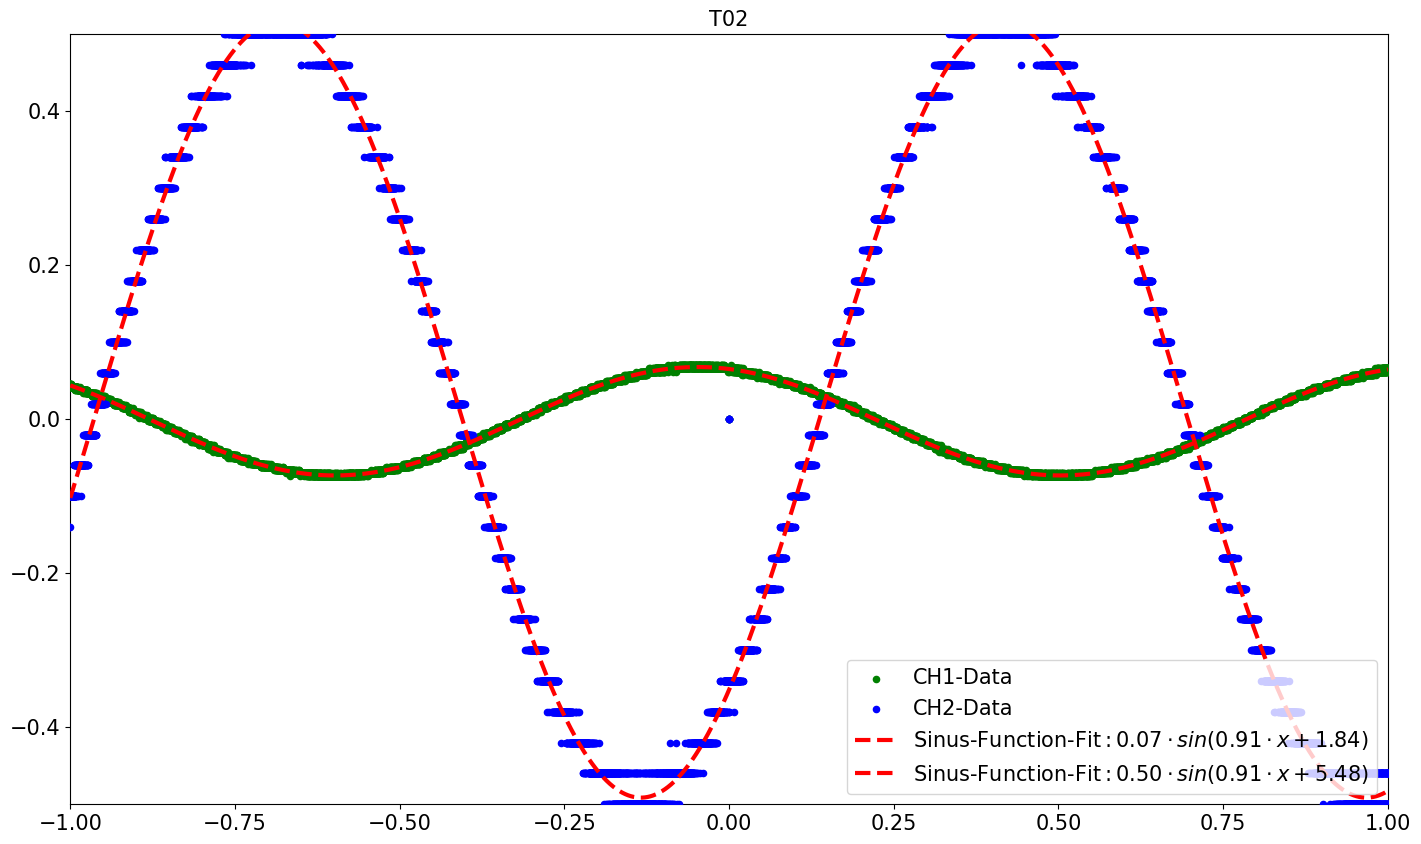

T03
Fitparameter
[ 0.04970284  0.93299341  2.0062061  -0.00281598]
zugehörige Uncertainty
[6.36744139e-06 3.49889472e-06 1.27500281e-04 4.49285151e-06]
Fitparameter
[-0.50379527  0.93301255  0.53170464  0.01371513]
zugehörige Uncertainty
[6.27656294e-05 3.45909537e-06 1.25039153e-04 4.44684664e-05]


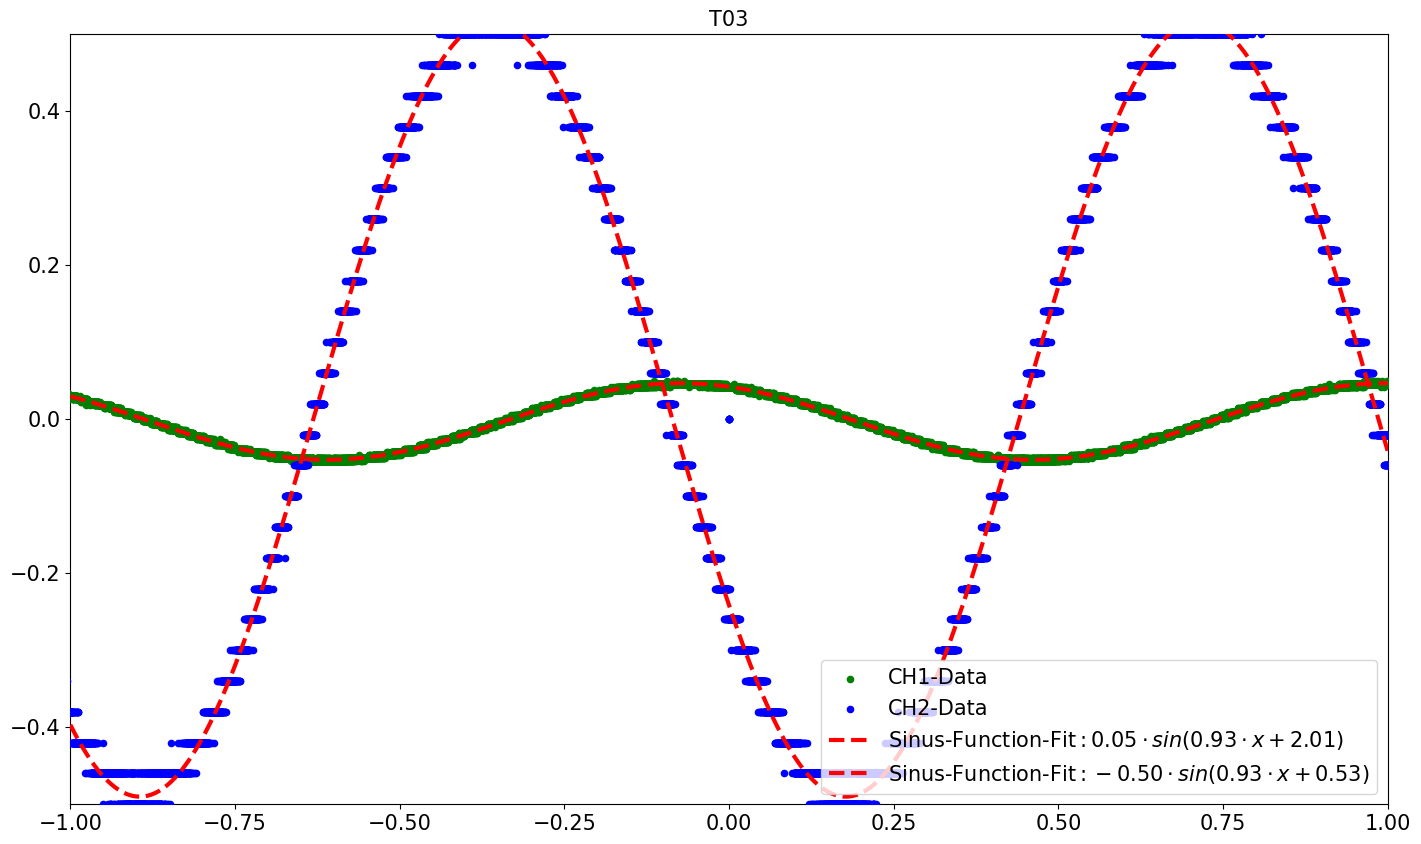

T04
Fitparameter
[ 0.04963746  0.93301088 -0.27378969 -0.00105729]
zugehörige Uncertainty
[3.81919875e-06 4.13810464e-06 7.60163282e-05 2.68525583e-06]
Fitparameter
[-0.50062412  0.95802608  1.53799134  0.01478129]
zugehörige Uncertainty
[6.47828867e-05 7.01235418e-06 1.28210290e-04 4.56237034e-05]


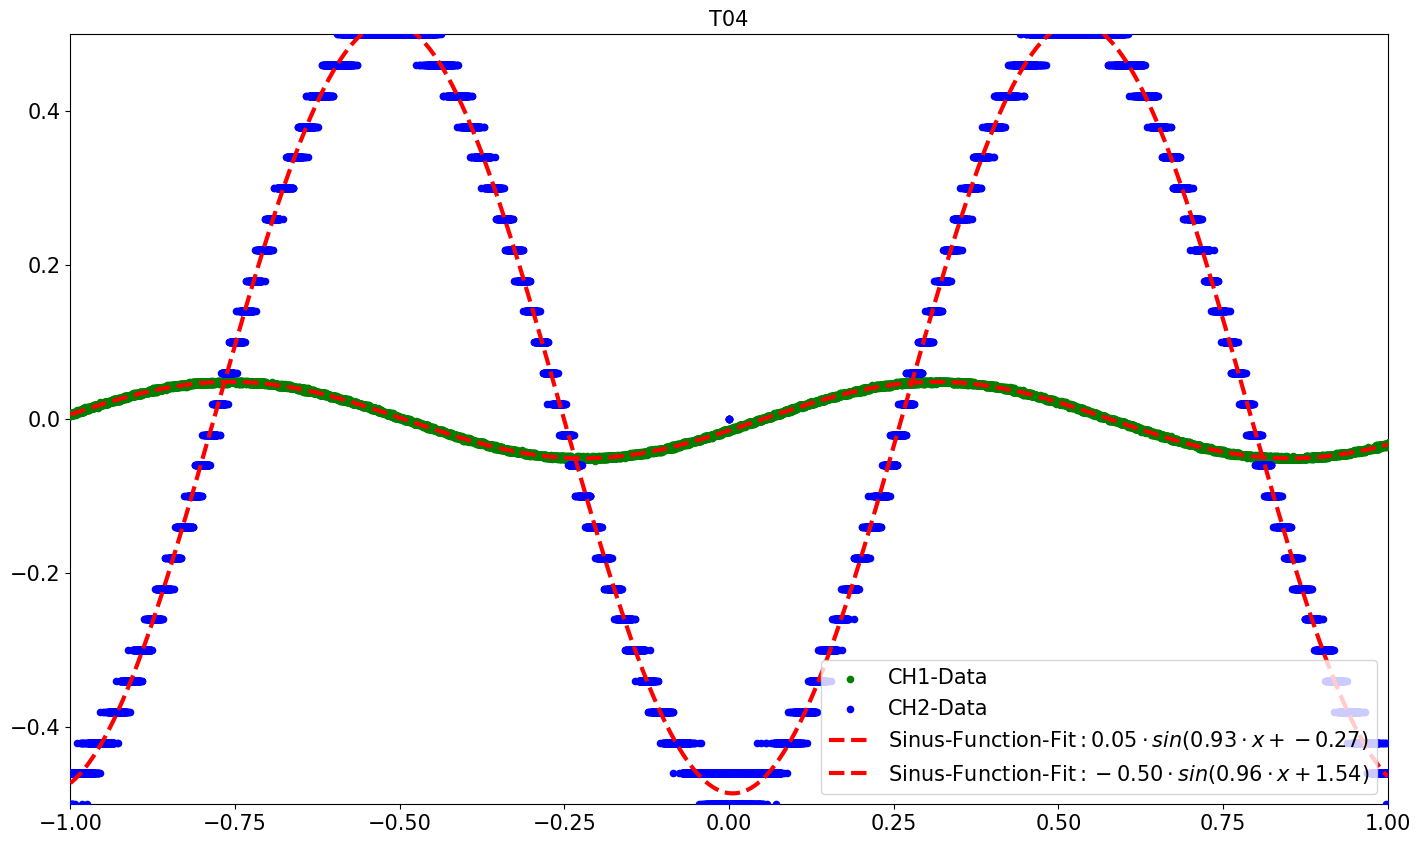

T05
Fitparameter
[ 3.77309794e-02  9.57947239e-01 -3.76315422e-01 -7.68155830e-04]
zugehörige Uncertainty
[3.80465430e-06 5.62768208e-06 1.01492228e-04 2.70004062e-06]
Fitparameter
[0.50050881 0.95799201 0.86283445 0.01435579]
zugehörige Uncertainty
[6.41623217e-05 7.04886199e-06 1.28056462e-04 4.53665796e-05]


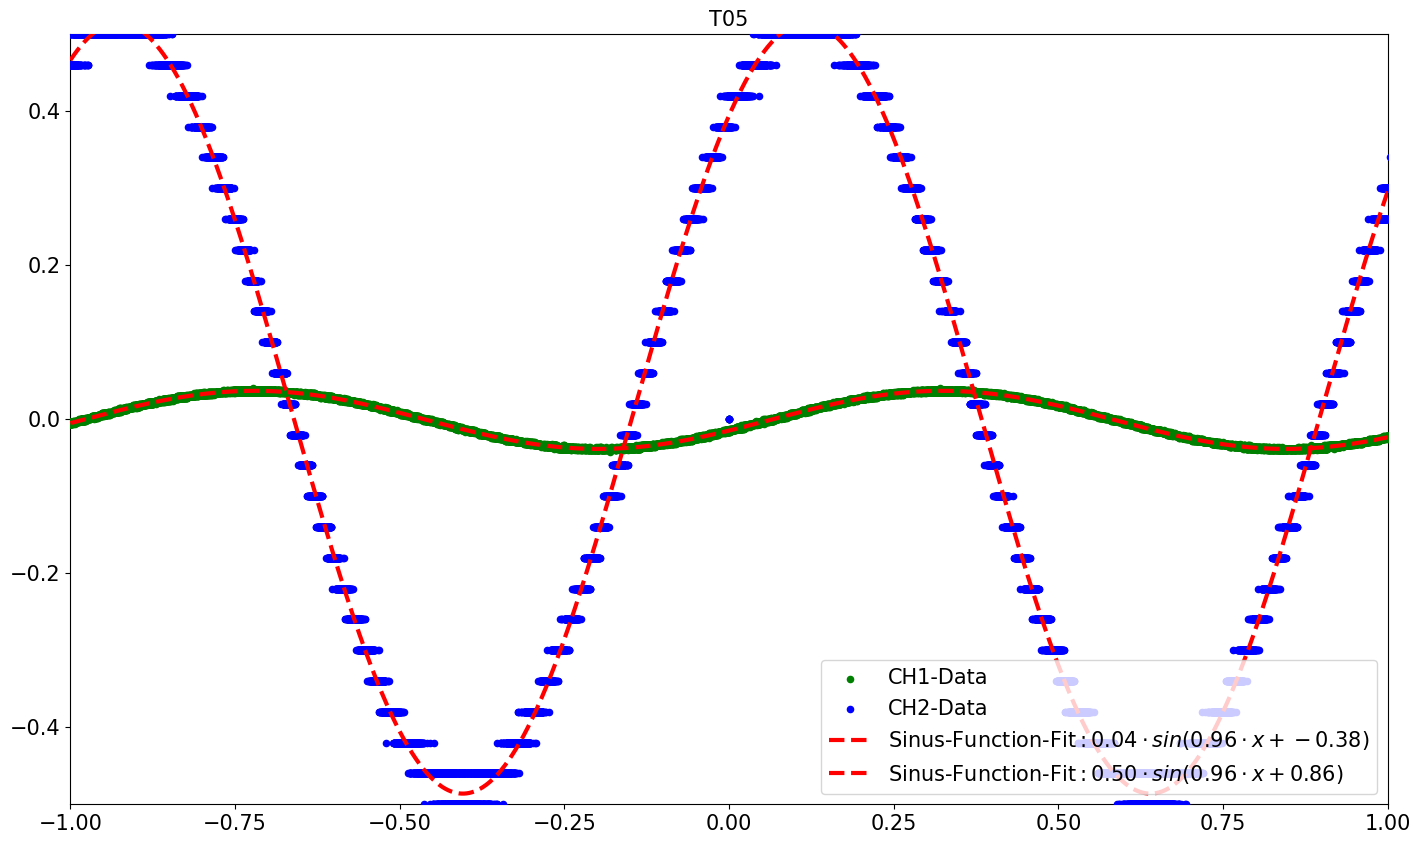

T06
Fitparameter
[ 3.00713679e-02  9.83002310e-01 -4.78973085e-01 -7.68929526e-04]
zugehörige Uncertainty
[3.81242368e-06 7.10743378e-06 1.27839211e-04 2.70848720e-06]
Fitparameter
[0.50061169 0.98296355 1.4095493  0.01314324]
zugehörige Uncertainty
[6.46495662e-05 6.94976580e-06 1.27370563e-04 4.55049103e-05]


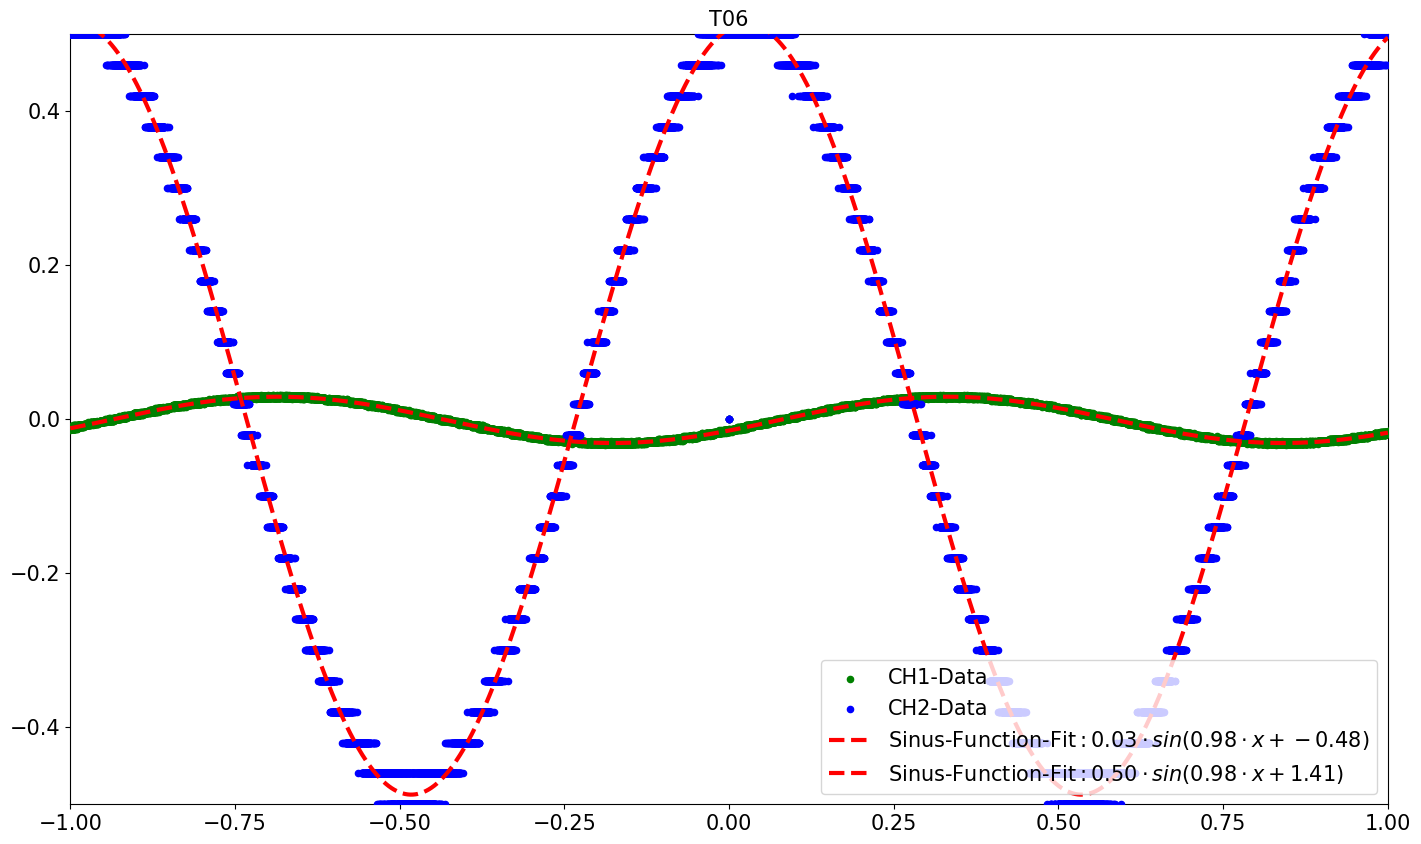

T07
Fitparameter
[ 0.02480159  1.00797387 -0.55526107 -0.00102052]
zugehörige Uncertainty
[3.78576863e-06 8.36563190e-06 1.52160290e-04 2.67437782e-06]
Fitparameter
[0.50130483 1.00796275 0.4495459  0.01287175]
zugehörige Uncertainty
[6.39376927e-05 6.96814965e-06 1.26952179e-04 4.51229731e-05]


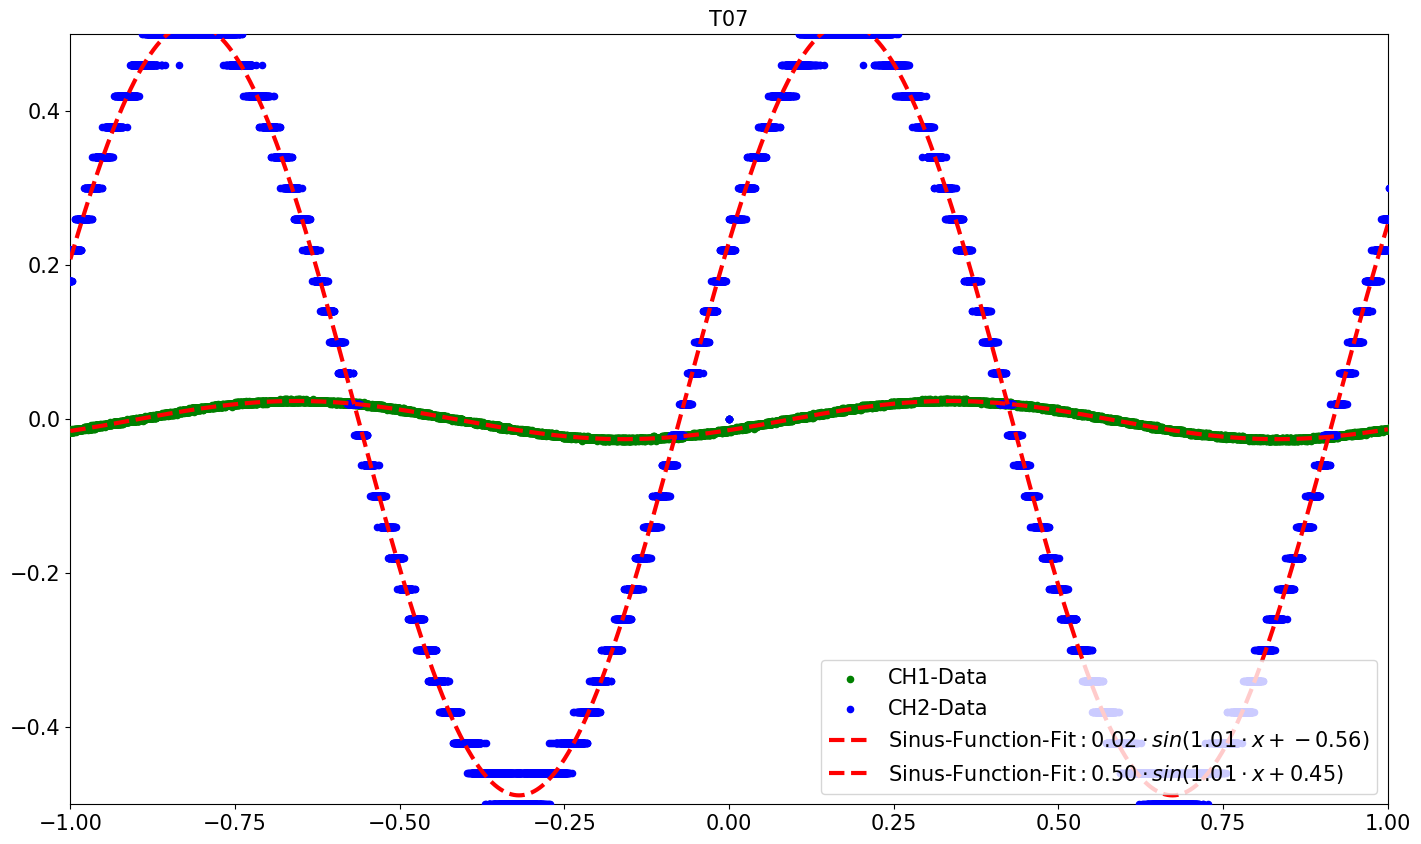

T08
Fitparameter
[ 0.11670261  0.83300809 -0.11275214 -0.00141266]
zugehörige Uncertainty
[3.91194176e-06 1.79061378e-06 3.30072810e-05 2.74601363e-06]
Fitparameter
[-0.50091176  0.83296979  0.3964383   0.01406142]
zugehörige Uncertainty
[6.40136507e-05 6.88595230e-06 1.26388679e-04 4.50378128e-05]


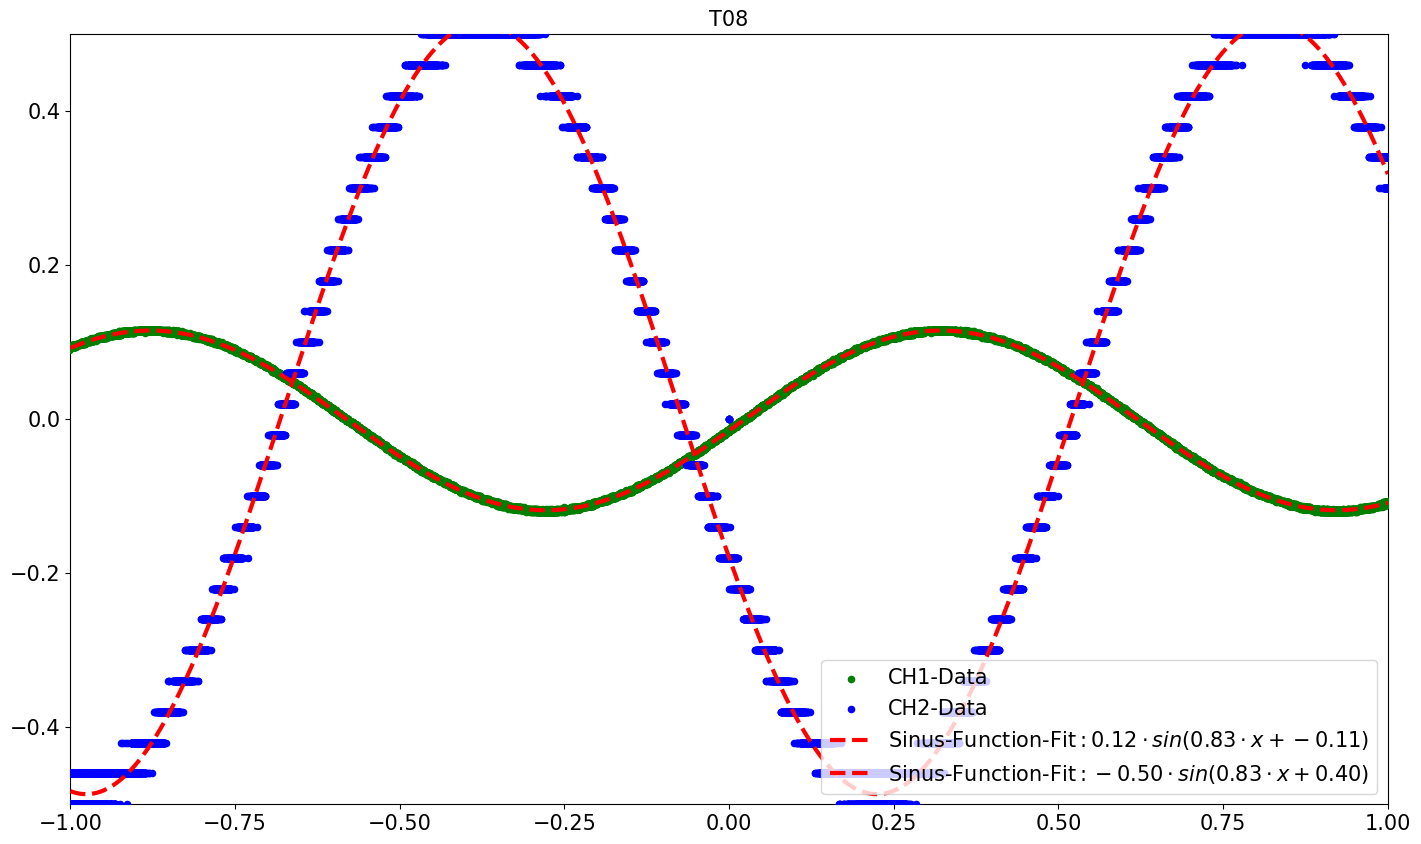

T09
Fitparameter
[ 7.67277679e-02  8.08010305e-01 -1.86423371e-01 -6.48857566e-04]
zugehörige Uncertainty
[6.34668545e-06 4.47831283e-06 8.19697328e-05 4.46724858e-06]
Fitparameter
[-0.50093741  0.80801712  0.821859    0.01429939]
zugehörige Uncertainty
[6.39985954e-05 7.07252549e-06 1.27896251e-04 4.53725735e-05]


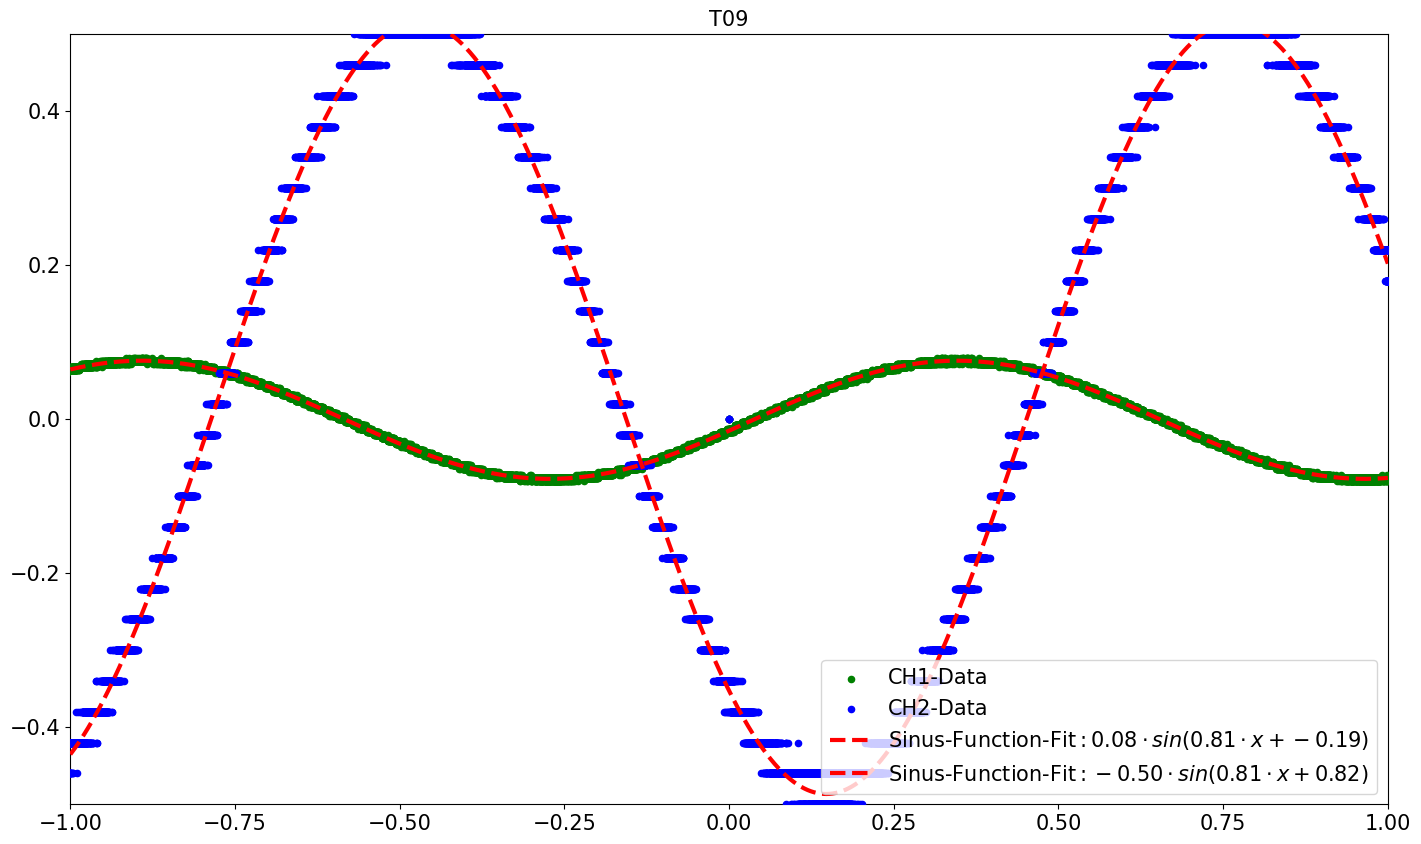

T10
Fitparameter
[ 5.50694054e-02  7.82976516e-01 -2.67433200e-01 -6.35030204e-04]
zugehörige Uncertainty
[6.34950982e-06 6.55627426e-06 1.17115032e-04 4.52644598e-06]
Fitparameter
[ 0.5008725   0.78299975 -3.54659293  0.01160968]
zugehörige Uncertainty
[6.30739686e-05 7.11859805e-06 1.27521690e-04 4.49102431e-05]


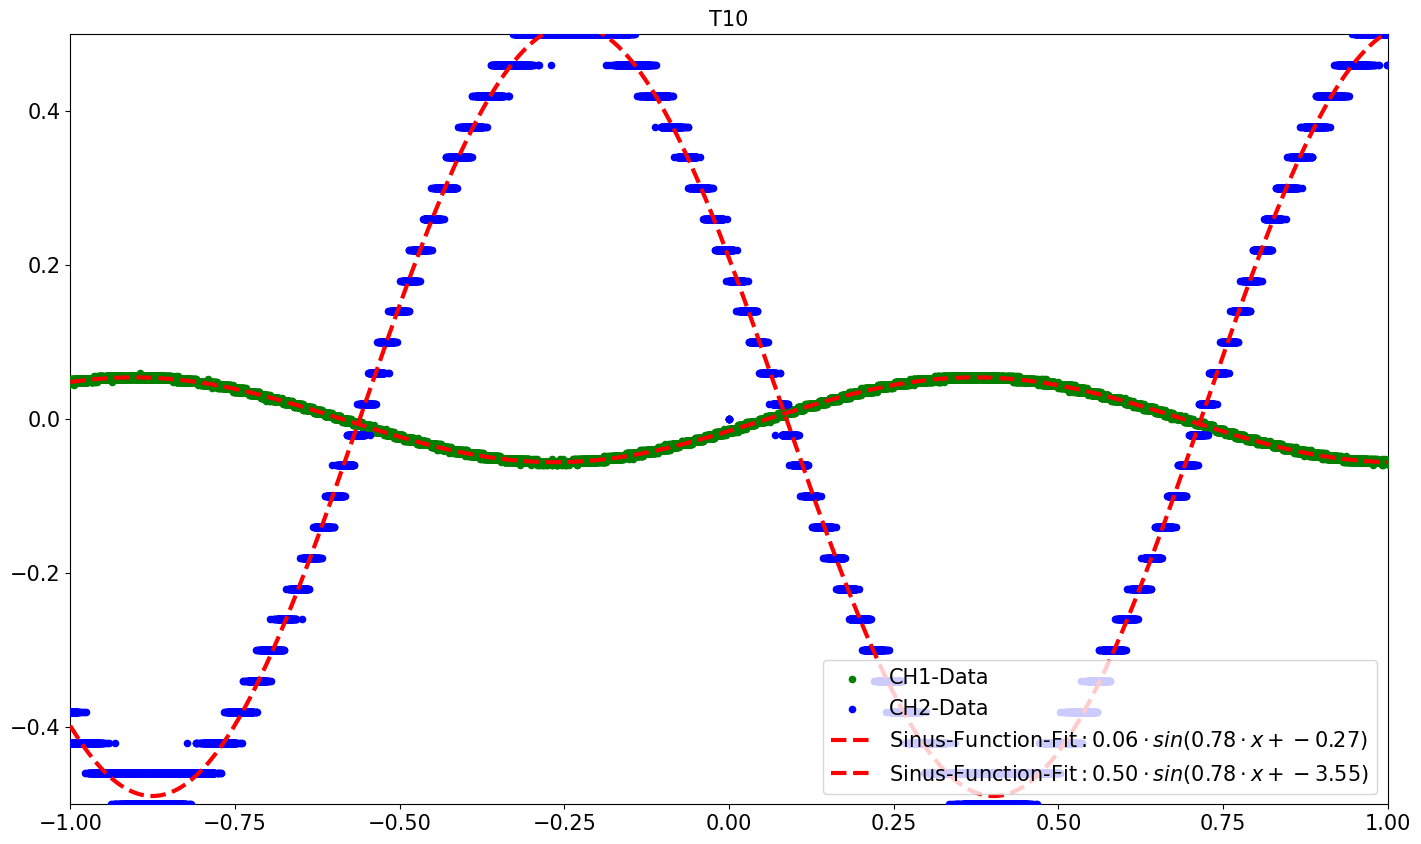

T11
Fitparameter
[ 4.25970871e-02  7.58005279e-01 -3.42536025e-01 -5.97585050e-04]
zugehörige Uncertainty
[6.32375998e-06 8.32268876e-06 1.49791344e-04 4.49432134e-06]
Fitparameter
[-0.50106466  0.75801356 -0.00841448  0.01324678]
zugehörige Uncertainty
[6.33411210e-05 7.12190340e-06 1.27841099e-04 4.50662536e-05]


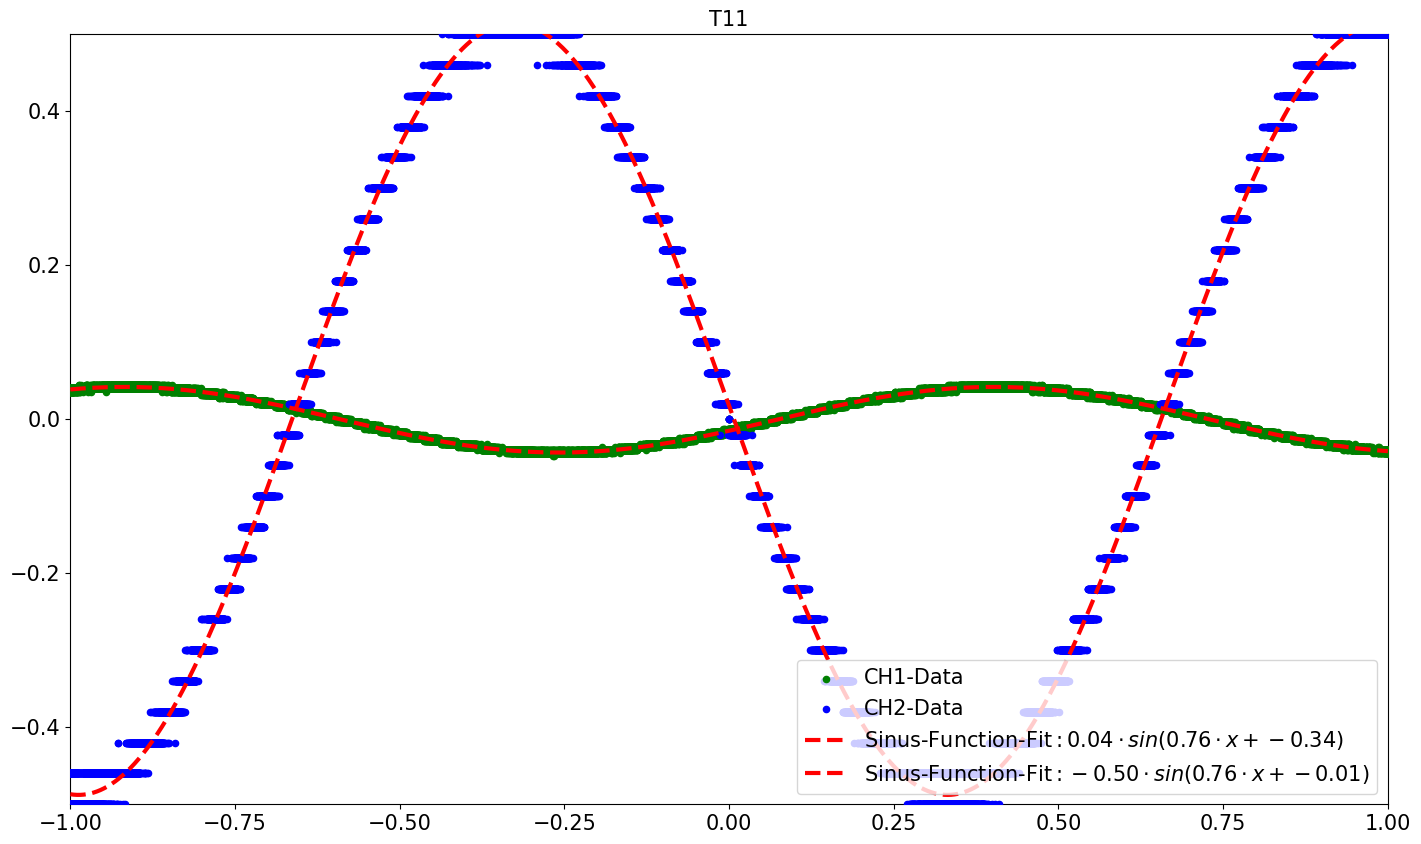

T12
Fitparameter
[ 3.47674351e-02  7.32994444e-01 -4.27375200e-01 -4.94053524e-04]
zugehörige Uncertainty
[6.43217621e-06 9.95624201e-06 1.82879419e-04 4.52508292e-06]
Fitparameter
[-0.50140394  0.73295305 -0.15001942  0.01342567]
zugehörige Uncertainty
[6.43779414e-05 6.83450662e-06 1.26221500e-04 4.51589226e-05]


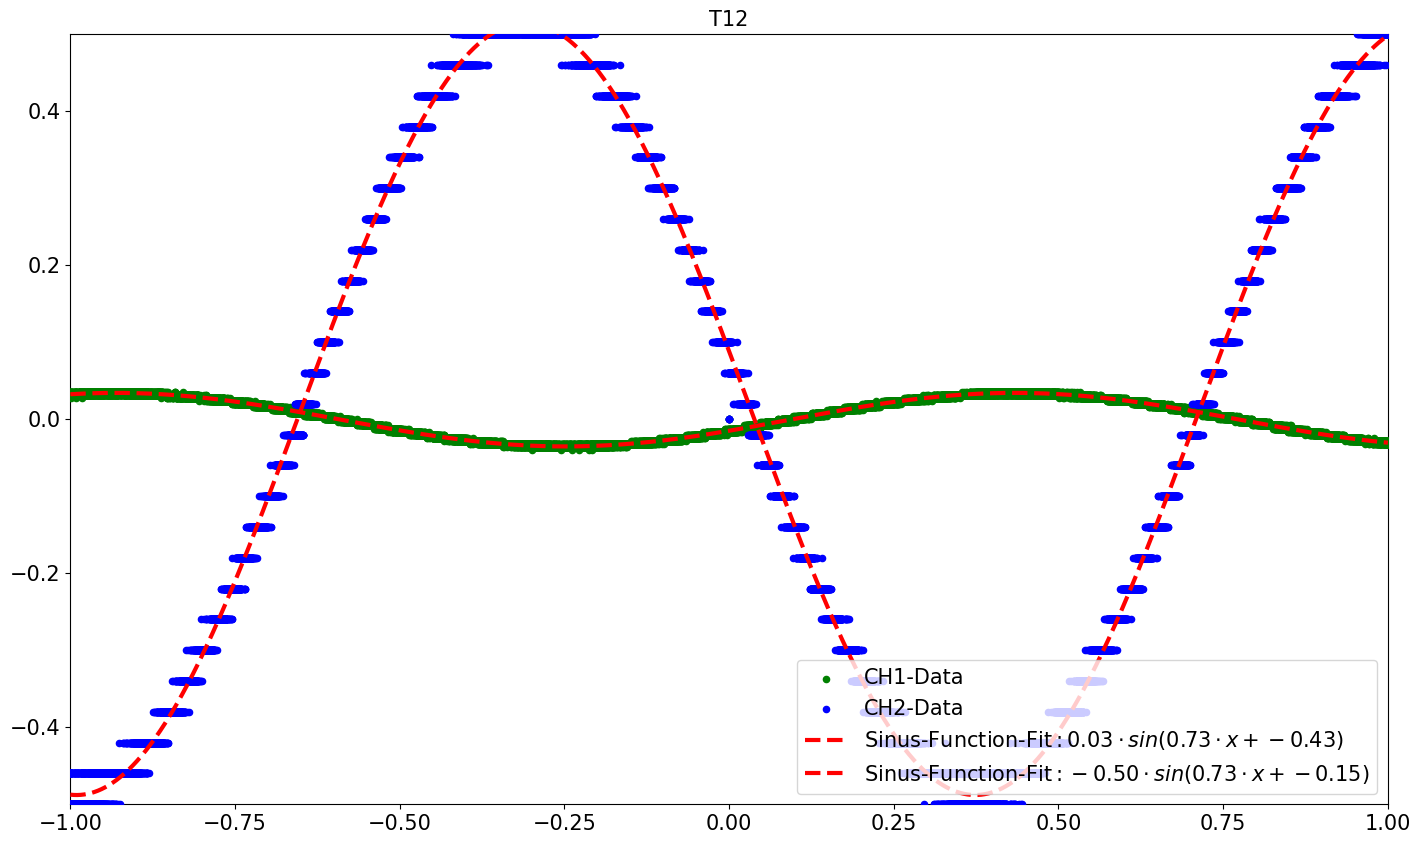

T13
Fitparameter
[ 2.95177681e-02  7.07965991e-01 -3.68392689e-01 -4.49739928e-04]
zugehörige Uncertainty
[6.21971355e-06 1.14350166e-05 2.09039660e-04 4.38245329e-06]
Fitparameter
[-0.5008074   0.70802128 -0.12909469  0.01154855]
zugehörige Uncertainty
[6.35279227e-05 6.84291083e-06 1.25480746e-04 4.46706705e-05]


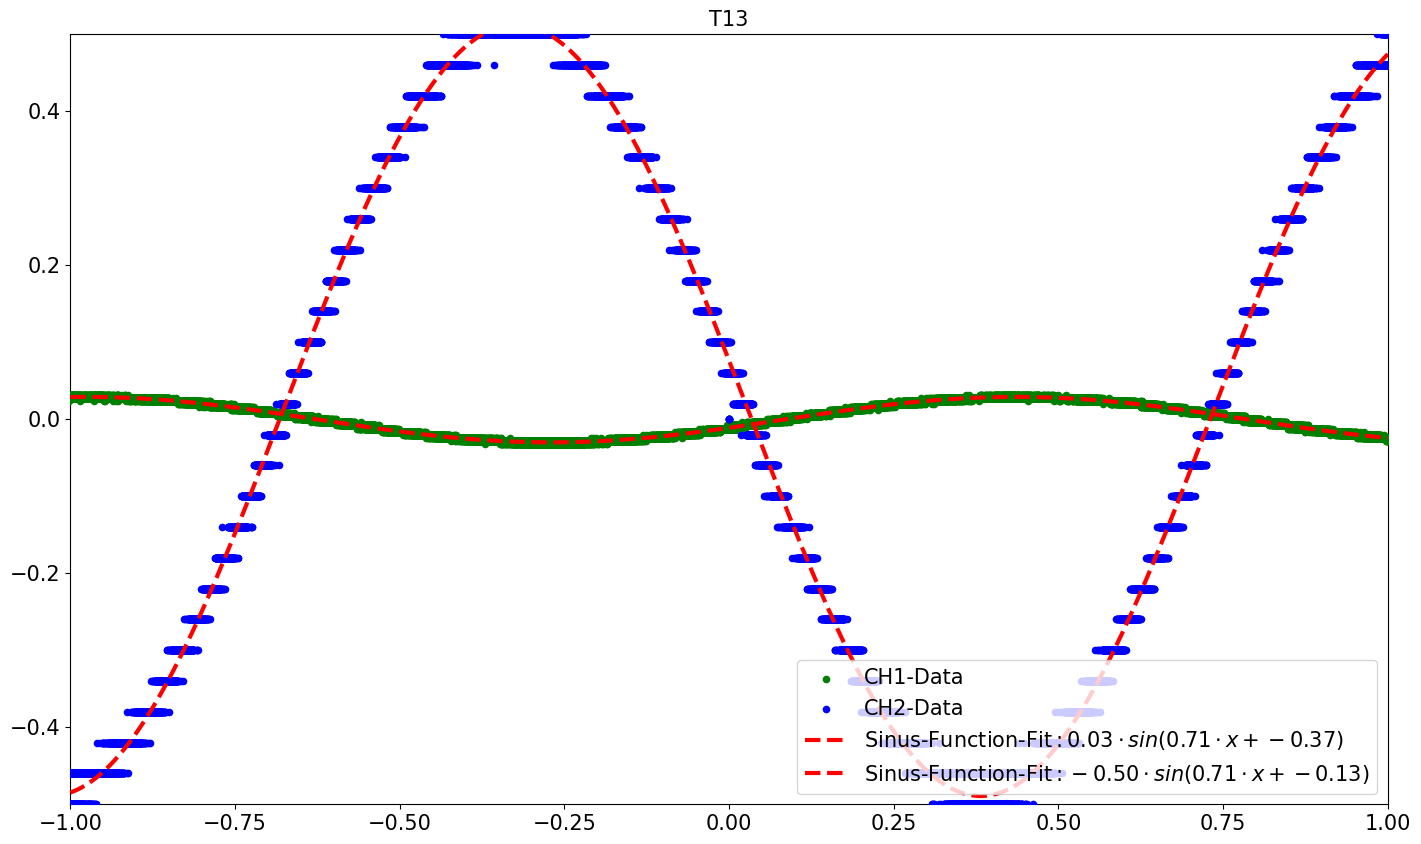

In [69]:
[t_T01, ch1_T01, ch2_T01] = read_oscilloscope_csv_data('T0001.CSV')
[t_T02, ch1_T02, ch2_T02] = read_oscilloscope_csv_data('T0002.CSV')
[t_T03, ch1_T03, ch2_T03] = read_oscilloscope_csv_data('T0003.CSV')
[t_T04, ch1_T04, ch2_T04] = read_oscilloscope_csv_data('T0004.CSV')
[t_T05, ch1_T05, ch2_T05] = read_oscilloscope_csv_data('T0005.CSV')
[t_T06, ch1_T06, ch2_T06] = read_oscilloscope_csv_data('T0006.CSV')
[t_T07, ch1_T07, ch2_T07] = read_oscilloscope_csv_data('T0007.CSV')
[t_T08, ch1_T08, ch2_T08] = read_oscilloscope_csv_data('T0008.CSV')
[t_T09, ch1_T09, ch2_T09] = read_oscilloscope_csv_data('T0009.CSV')
[t_T10, ch1_T10, ch2_T10] = read_oscilloscope_csv_data('T0010.CSV')
[t_T11, ch1_T11, ch2_T11] = read_oscilloscope_csv_data('T0011.CSV')
[t_T12, ch1_T12, ch2_T12] = read_oscilloscope_csv_data('T0012.CSV')
[t_T13, ch1_T13, ch2_T13] = read_oscilloscope_csv_data('T0013.CSV')


print('T01 bei f = 0,88Hz')
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T01, ch1_T01, label = 'CH1-Data', color='green', s=20, zorder= 5)
plt.scatter(t_T01, ch2_T01, label = 'CH2-Data', color='blue', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T01, ch1_T01, 100000, [1, 0.9, 1, 1])
pars1a = pars
std1a = stdevs
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T01, ch2_T01, 100000, [1, 0.9, 1, 1])
pars1b = pars
std1b = stdevs
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin(2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Zeit \enspace t \enspace (s)$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A  \enspace (V)$', fontsize=15)
plt.title('T01 mit f=0,88Hz', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5]) #Achsenanpassung
plt.show()


print('T02')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T02, ch1_T02, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T02, ch2_T02, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T02, ch1_T02, 100000, [1, 0.9, 1, 1])
pars2a = pars
std2a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T02, ch2_T02, 100000, [1, 0.9, 1, 1])
pars2b = pars
std2b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T02', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T03')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T03, ch1_T03, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T03, ch2_T03, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T03, ch1_T03, 100000, [1, 0.9, 1, 1])
pars3a = pars
std3a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T03, ch2_T03, 100000, [1, 0.9, 1, 1])
pars3b = pars
std3b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T03', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T04')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T04, ch1_T04, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T04, ch2_T04, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T04, ch1_T04, 100000, [1, 0.9, 1, 1])
pars4a = pars
std4a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T04, ch2_T04, 100000, [1, 0.9, 1, 1])
pars4b = pars
std4b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T04', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T05')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T05, ch1_T05, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T05, ch2_T05, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T05, ch1_T05, 100000, [1, 0.9, 1, 1])
pars5a = pars
std5a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T05, ch2_T05, 100000, [1, 0.9, 1, 1])
pars5b = pars
std5b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T05', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T06')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T06, ch1_T06, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T06, ch2_T06, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T06, ch1_T06, 100000, [1, 0.9, 1, 1])
pars6a = pars
std6a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T06, ch2_T06, 100000, [1, 0.9, 1, 1])
pars6b = pars
std6b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T06', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T07')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T07, ch1_T07, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T07, ch2_T07, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T07, ch1_T07, 100000, [1, 1, 1, 1])
pars7a = pars
std7a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T07, ch2_T07, 100000, [1, 1, 1, 1])
pars7b = pars
std7b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T07', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T08')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T08, ch1_T08, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T08, ch2_T08, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T08, ch1_T08, 100000, [1, 0.9, 1, 1])
pars8a = pars
std8a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T08, ch2_T08, 100000, [1, 0.9, 1, 1])
pars8b = pars
std8b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T08', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T09')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T09, ch1_T09, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T09, ch2_T09, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T09, ch1_T09, 100000, [1, 0.8, 1, 1])
pars9a = pars
std9a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T09, ch2_T09, 100000, [1, 0.8, 1, 1])
pars9b = pars
std9b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T09', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T10')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T10, ch1_T10, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T10, ch2_T10, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T10, ch1_T10, 100000, [1, 0.8, 1, 1])
pars10a = pars
std10a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T10, ch2_T10, 100000, [1, 0.8, 1, 1])
pars10b = pars
std10b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T10', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T11')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T11, ch1_T11, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T11, ch2_T11, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T11, ch1_T11, 100000, [1, 0.8, 1, 1])
pars11a = pars
std11a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T11, ch2_T11, 100000, [1, 0.8, 1, 1])
pars11b = pars
std11b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T11', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T12')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T12, ch1_T12, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T12, ch2_T12, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T12, ch1_T12, 100000, [1, 0.8, 1, 1])
pars12a = pars
std12a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T12, ch2_T12, 100000, [1, 0.8, 1, 1])
pars12b = pars
std12b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T12', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T13')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T13, ch1_T13, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T13, ch2_T13, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T13, ch1_T13, 100000, [1, 0.8, 1, 1])
pars13a = pars
std13a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T13, ch2_T13, 100000, [1, 0.8, 1, 1])
pars13b = pars
std13b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T13', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()



In [70]:
values = np.array([pars1a, pars1b, pars2a, pars2b, pars3a, pars3b, pars4a, pars4b, pars5a, pars5b, pars6a, pars6b, pars7a, pars7b, pars8a, pars8b, pars9a, pars9b, pars10a, pars10b, pars11a, pars11b, pars12a, pars12b, pars13a, pars13b])
unc = np.array([std1a, std1b, std2a, std2b, std3a, std3b, std4a, std4b, std5a, std5b, std6a, std6b, std7a, std7b, std8a, std8b, std9a, std9b, std10a, std10b, std11a, std11b, std12a, std12b, std13a, std13b])

uarray = unp.uarray( values, unc)
print(uarray)


[[0.10930071685183024+/-6.5943323437534034e-06
  0.883013004118954+/-1.6658213519348722e-06
  0.7364689501057732+/-6.0382146415567054e-05
  -0.002163392569933767+/-4.665701112994695e-06]
 [-0.503977623790905+/-6.336627525126995e-05
  0.8830058790232268+/-3.4159223208280868e-06
  1.4310018370791495+/-0.00012478958302361426
  0.012714783045452802+/-4.4652773148374206e-05]
 [0.07041393205745472+/-6.544480219541486e-06
  0.9080116984021419+/-2.5970054375684137e-06
  1.8425165794321403+/-9.352996949505907e-05
  -0.002550451929070907+/-4.645297286509028e-06]
 [0.5034106916929633+/-6.25435593819602e-05
  0.9080078377703249+/-3.428511257494469e-06
  5.476888049335714+/-0.0001242858136139848
  0.012023172827272556+/-4.424890693960111e-05]
 [0.04970283995162678+/-6.367441394514776e-06
  0.9329934094512395+/-3.498894717710991e-06
  2.006206098569304+/-0.0001275002812824858
  -0.0028159791196001164+/-4.492851508297995e-06]
 [-0.5037952704103417+/-6.276562939078228e-05
  0.9330125548289655+/-3.4590

In [71]:
v = np.array([])
i = 0
while i <= 25:
  if uarray[i][0] > 0:
    v1 = uarray[i][2]
  if uarray[i][0] < 0:
    v1 = uarray[i][2]+ np.pi
  if uarray[i+1][0] > 0:
    v2 = uarray[i+1][2]
  if uarray[i+1][0] < 0:
    v2 = uarray[i+1][2]+ np.pi
  i = i+2
  v = np.append(v, v2-v1)
  v = np.append(v, 0)
print(v)

# Add a new axis to the 1D array
new_column_array = v[:, np.newaxis]

# Concatenate the arrays horizontally
new = np.column_stack((uarray, v))
print(new)

d_koff = d1/omega0
print('d_koff:', d_koff)

values = np.random.random((13, 3))

# Create an array of uncertainties
uncertainties = np.random.random((13, 3)) * 0.1

# Create a uarray with the nominal values and uncertainties
end = unp.uarray(values, uncertainties)
i= 0
while i <= 25:
  j = i//2
  eta = new[i][1]*2*np.pi/omega0
  end[j][0] = new[i][0]
  end[j][1] = new[i][4]
  end[j][2] = eta
  i = i+2

print(end)

[3.8361255405631693+/-0.00013863060137270737 0
 3.6343714699035736+/-0.0001555468375102395 0
 1.6670911964818371+/-0.0001785808265980066 0
 4.953373690369877+/-0.0001490515364466536 0
 1.2391498742578584+/-0.0001633986832833821 0
 1.888522388697194+/-0.00018046086555626971 0
 1.0048069740860717+/-0.00019816561166512657 0
 3.6507830850470464+/-0.00013062763411076937 0
 4.149875025602161+/-0.0001519094735747692 0
 -3.2791597284479477+/-0.00017314072972850466 0
 3.4757141965701406+/-0.00019692839664375118 0
 3.4189484298236765+/-0.00022220879616096146 0
 3.380890651463596+/-0.00024380934583847152 0]
[[0.10930071685183024+/-6.5943323437534034e-06
  0.883013004118954+/-1.6658213519348722e-06
  0.7364689501057732+/-6.0382146415567054e-05
  -0.002163392569933767+/-4.665701112994695e-06
  3.8361255405631693+/-0.00013863060137270737]
 [-0.503977623790905+/-6.336627525126995e-05
  0.8830058790232268+/-3.4159223208280868e-06
  1.4310018370791495+/-0.00012478958302361426
  0.012714783045452802+/-4

Fitparameter
[0.00969809 0.00098997]
zugehörige Uncertainty
[3.92722911e-05 2.01544342e-05]


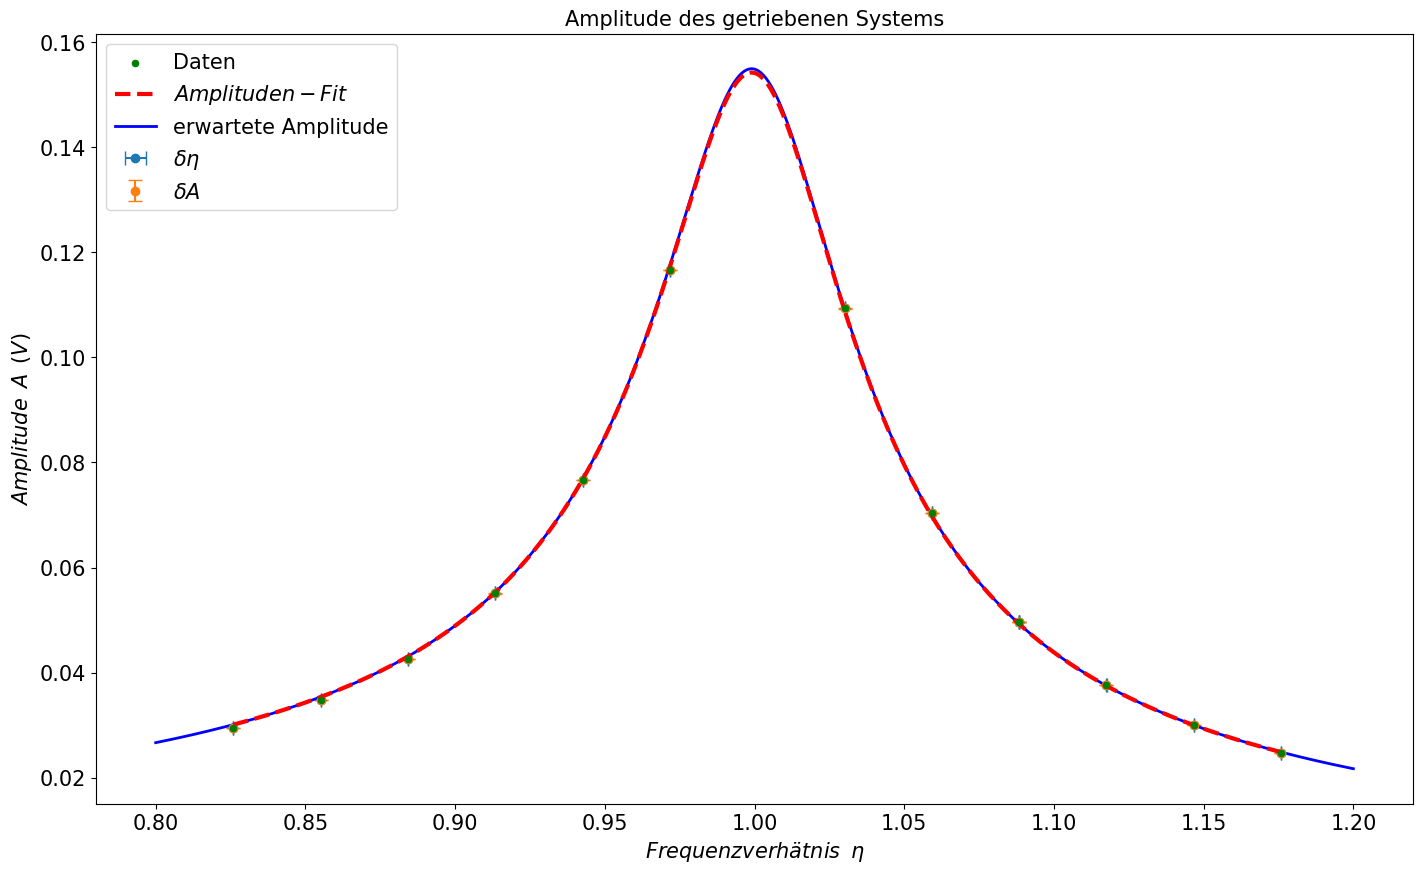

In [72]:
plt.subplots(1,1,figsize=(17, 10));

x = [float(i[2].nominal_value) for i in end]
y = [float(i[0].nominal_value) for i in end]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i[2].std_dev) for i in end]
y_error = [float(i[0].std_dev) for i in end]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δ\eta$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δA$')


pars, stdevs, xfit, yfit = daten_fitten(quatschfunktion, x, y, 100000, [1, 9e-4])
plt.plot(xfit, yfit, '--', color='red', label=r'$Amplituden-Fit$', zorder=4, linewidth=3)

x = np.linspace(0.8, 1.2, 1000)

a=pars[0]
d=np.power(d_koff1.nominal_value,2)

y = quatschfunktion(x, a, d)

plt.plot(x, y, label=r'erwartete Amplitude', color='blue', linewidth=2 )



# Add axis labels and a title
plt.xlabel(r'$Frequenzverhätnis \enspace \eta$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A \enspace (V)$', fontsize=15)
plt.title('Amplitude des getriebenen Systems', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

<ipython-input-62-367d2dd27b23>:79: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(2*a*x/(1-np.power(x,2)))-np.pi


Fitparameter
[1177234.89127675]
zugehörige Uncertainty
[1.48779123e+13]
Fitparameter
[-1135981.73127884]
zugehörige Uncertainty
[5.2373298e+12]


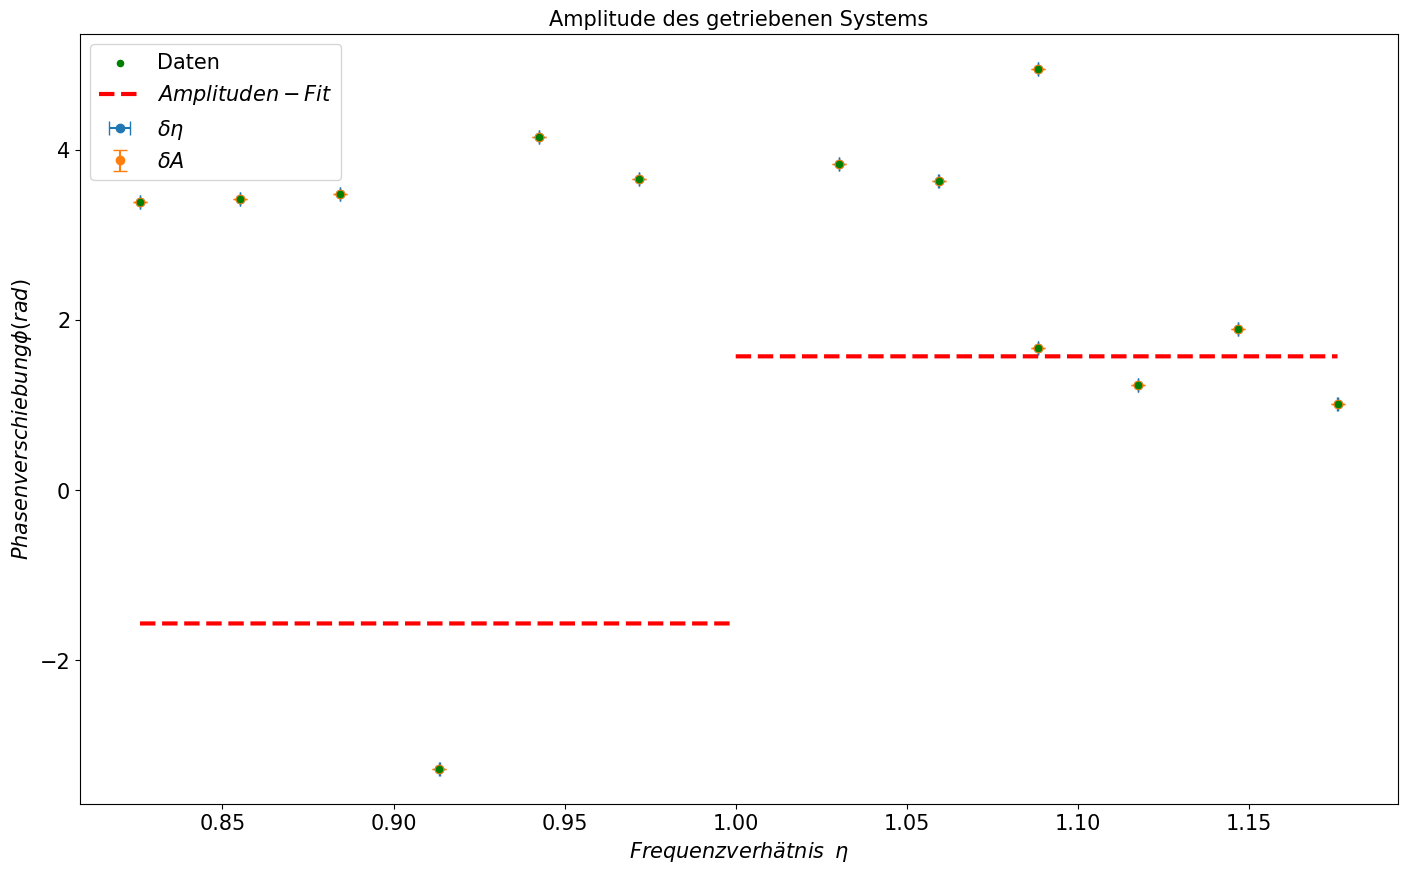

In [73]:
plt.subplots(1,1,figsize=(17, 10));

x = [float(i[2].nominal_value) for i in end]
y = [float(i[1].nominal_value) for i in end]


plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i[2].std_dev) for i in end]
y_error = [float(i[1].std_dev) for i in end]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δ\eta$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δA$')

indicesXD = [index for index, value in enumerate(x) if value < 1]
indicesXU = [index for index, value in enumerate(x) if value > 1]

x1 = [x[index] for index in indicesXD]
y1 = [y[index] for index in indicesXD]
x1 = np.append(x1, 1)
y1 = np.append(y1, np.pi/2)

pars, stdevs, xfit, yfit = daten_fitten(ekeltan, x1, y1, 100000, [1])
plt.plot(xfit, yfit, '--', color='red', label=r'$Amplituden-Fit$', zorder=4, linewidth=3)

x2 = [x[index] for index in indicesXU]
y2 = [y[index] for index in indicesXU]
x2 = np.append(x2, 1.0000001)
y2 = np.append(y2, np.pi/2)


pars, stdevs, xfit, yfit = daten_fitten(ekeltan2, x2, y2, 100000, [1])
plt.plot(xfit, yfit, '--', color='red', zorder=4, linewidth=3)

# Add axis labels and a title
plt.xlabel(r'$Frequenzverhätnis \enspace \eta$', fontsize=15)
plt.ylabel(r'$Phasenverschiebung \phi (rad)$', fontsize=15)
plt.title('Amplitude des getriebenen Systems', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

T01
Fitparameter
[ 0.02949264  0.87995973 -0.48771049 -0.00109597]
zugehörige Uncertainty
[6.10907041e-06 1.16480821e-05 2.09201360e-04 4.34422250e-06]
Fitparameter
[-0.49913827  0.87998193  1.33872254  0.01244974]
zugehörige Uncertainty
[6.42741126e-05 6.90362475e-06 1.26749800e-04 4.52071932e-05]


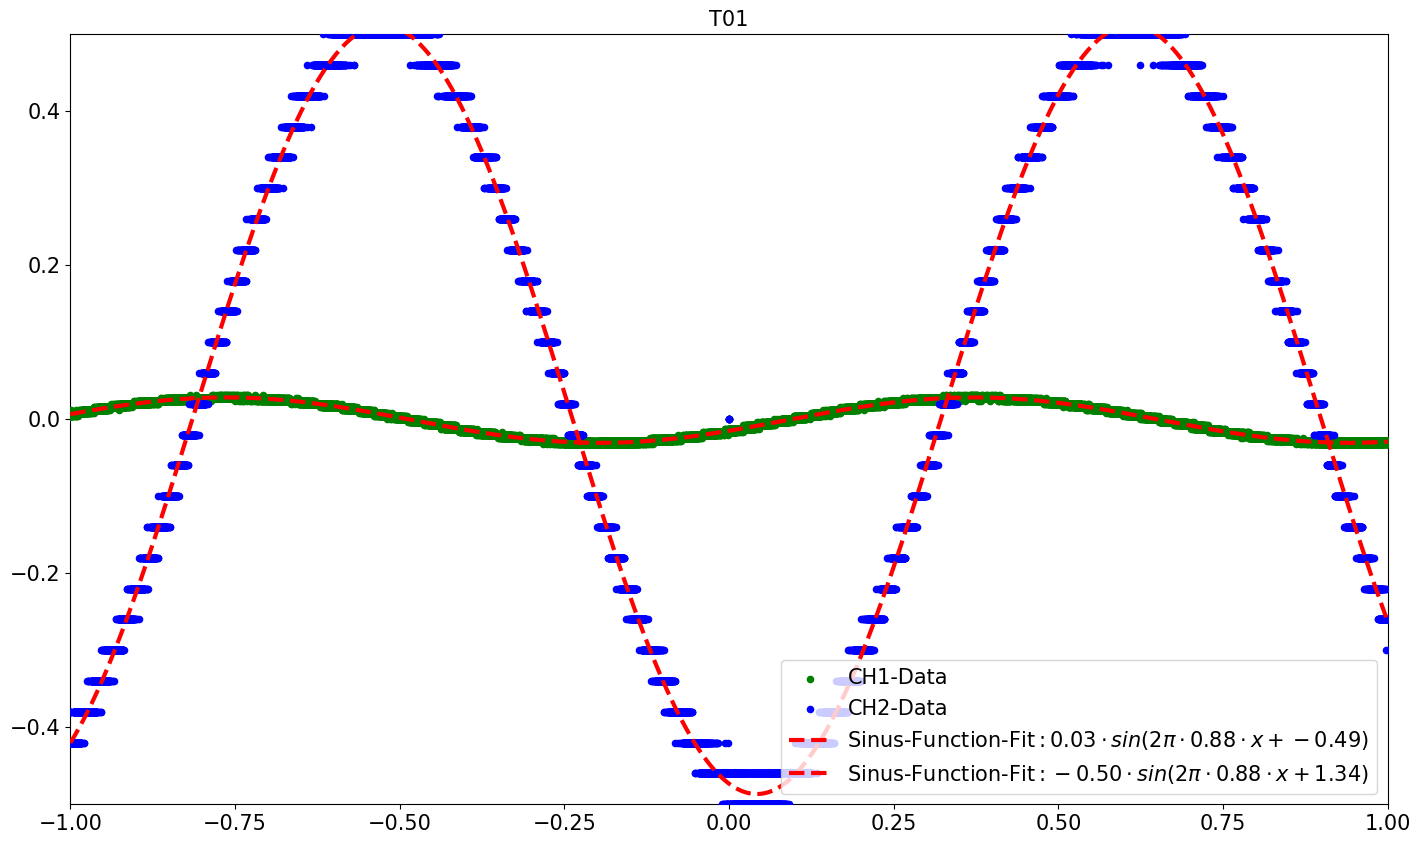

T02
Fitparameter
[ 0.03049468  0.86004092 -0.46426176 -0.00125854]
zugehörige Uncertainty
[6.04471934e-06 1.10786619e-05 1.99677355e-04 4.29210132e-06]
Fitparameter
[-0.50095318  0.85997735  1.21367171  0.01259702]
zugehörige Uncertainty
[6.47446747e-05 7.00304772e-06 1.28069383e-04 4.56103345e-05]


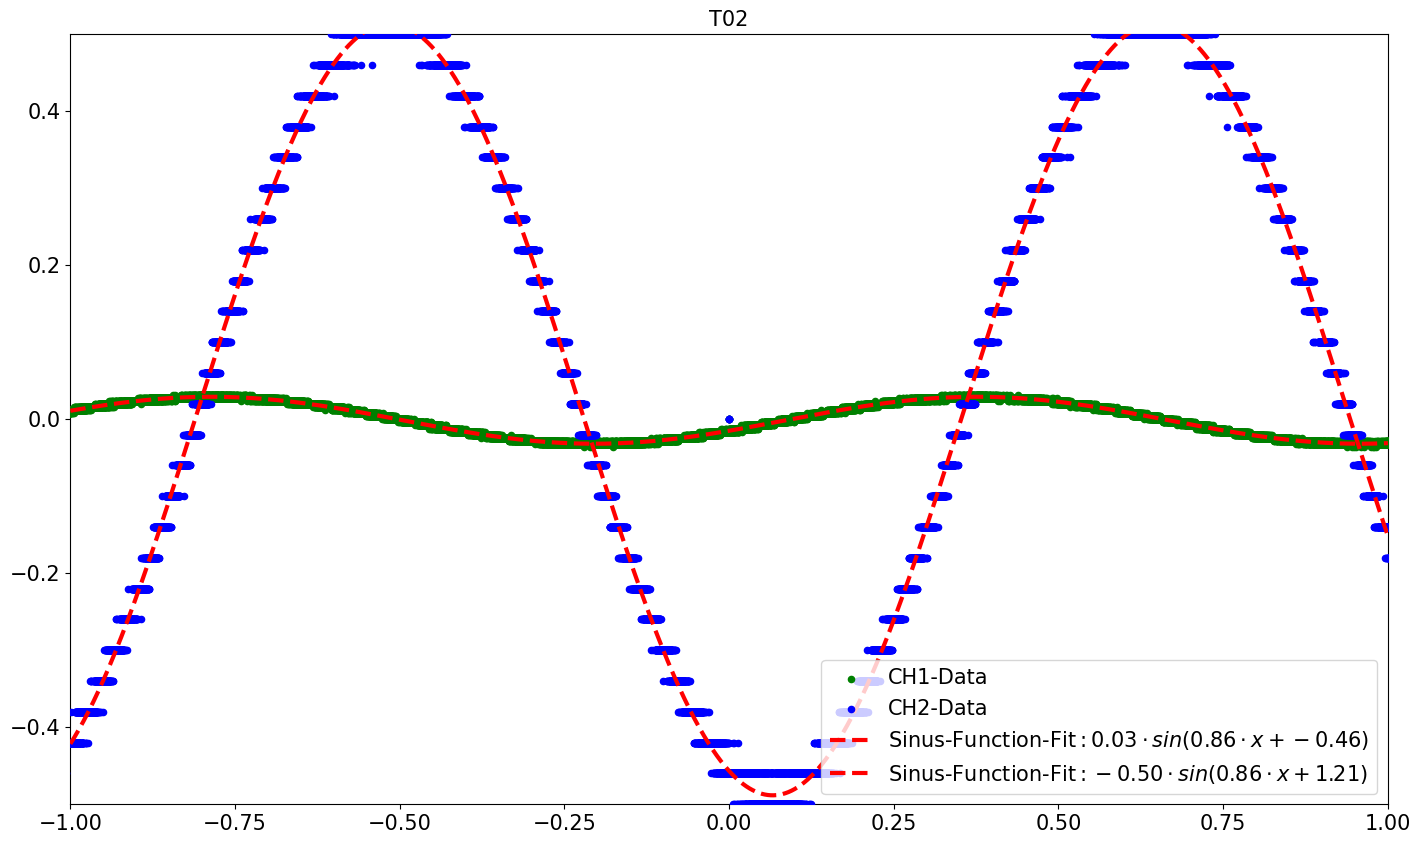

T03
Fitparameter
[ 0.03102104  0.83997233 -0.47183275 -0.00113494]
zugehörige Uncertainty
[6.13431655e-06 1.07673582e-05 1.96625124e-04 4.32740165e-06]
Fitparameter
[-0.50030206  0.84000329  1.05251131  0.01393365]
zugehörige Uncertainty
[6.41863637e-05 7.14804112e-06 1.28964926e-04 4.55355778e-05]


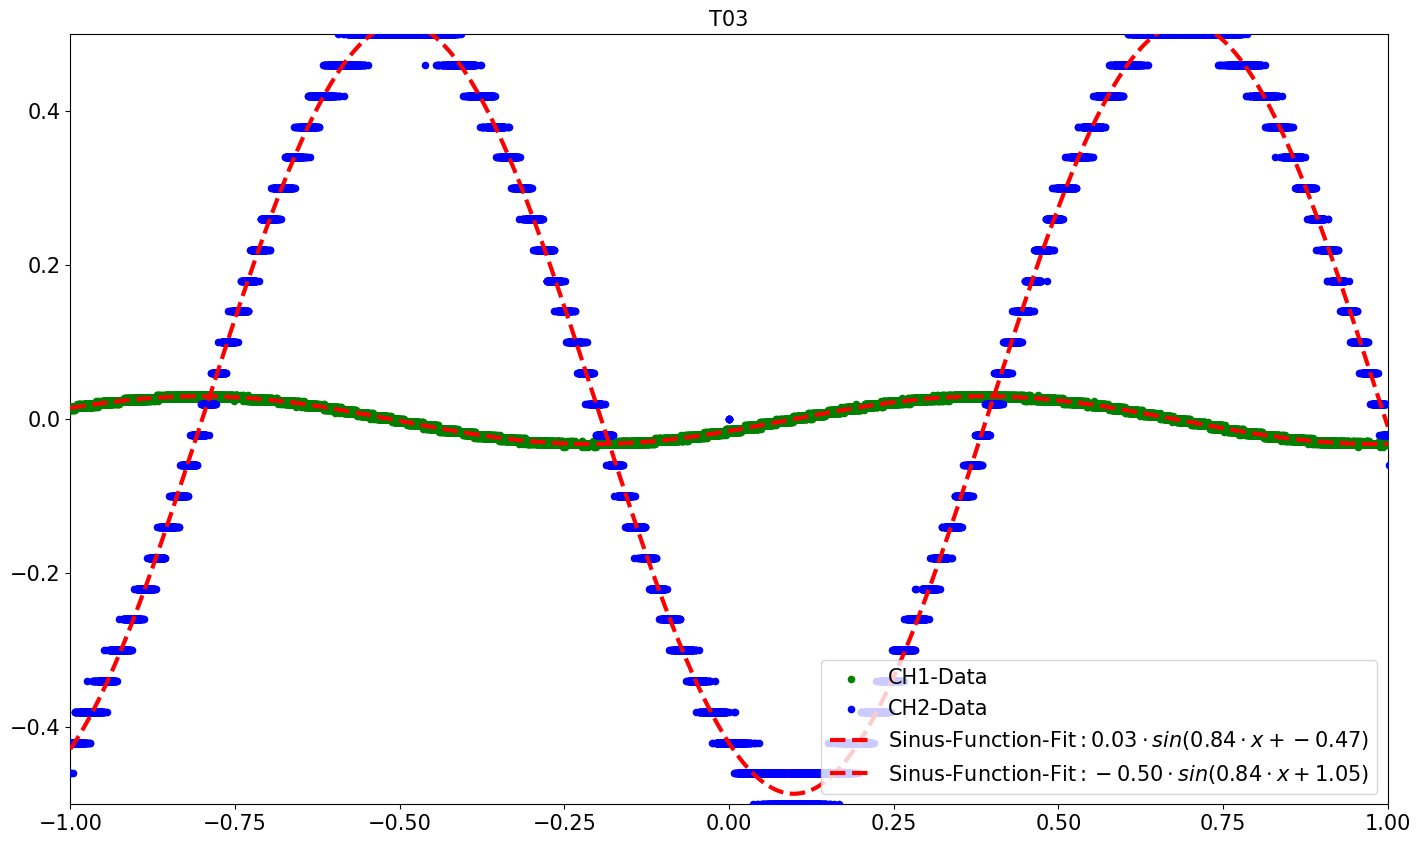

T04
Fitparameter
[ 2.79123398e-02  8.99938383e-01 -3.57520224e-01 -8.79151092e-04]
zugehörige Uncertainty
[6.12497449e-06 1.20999065e-05 2.19433783e-04 4.33197195e-06]
Fitparameter
[-0.50046734  0.90000378  1.60607151  0.01189519]
zugehörige Uncertainty
[6.43155767e-05 7.11868448e-06 1.28451264e-04 4.56284723e-05]


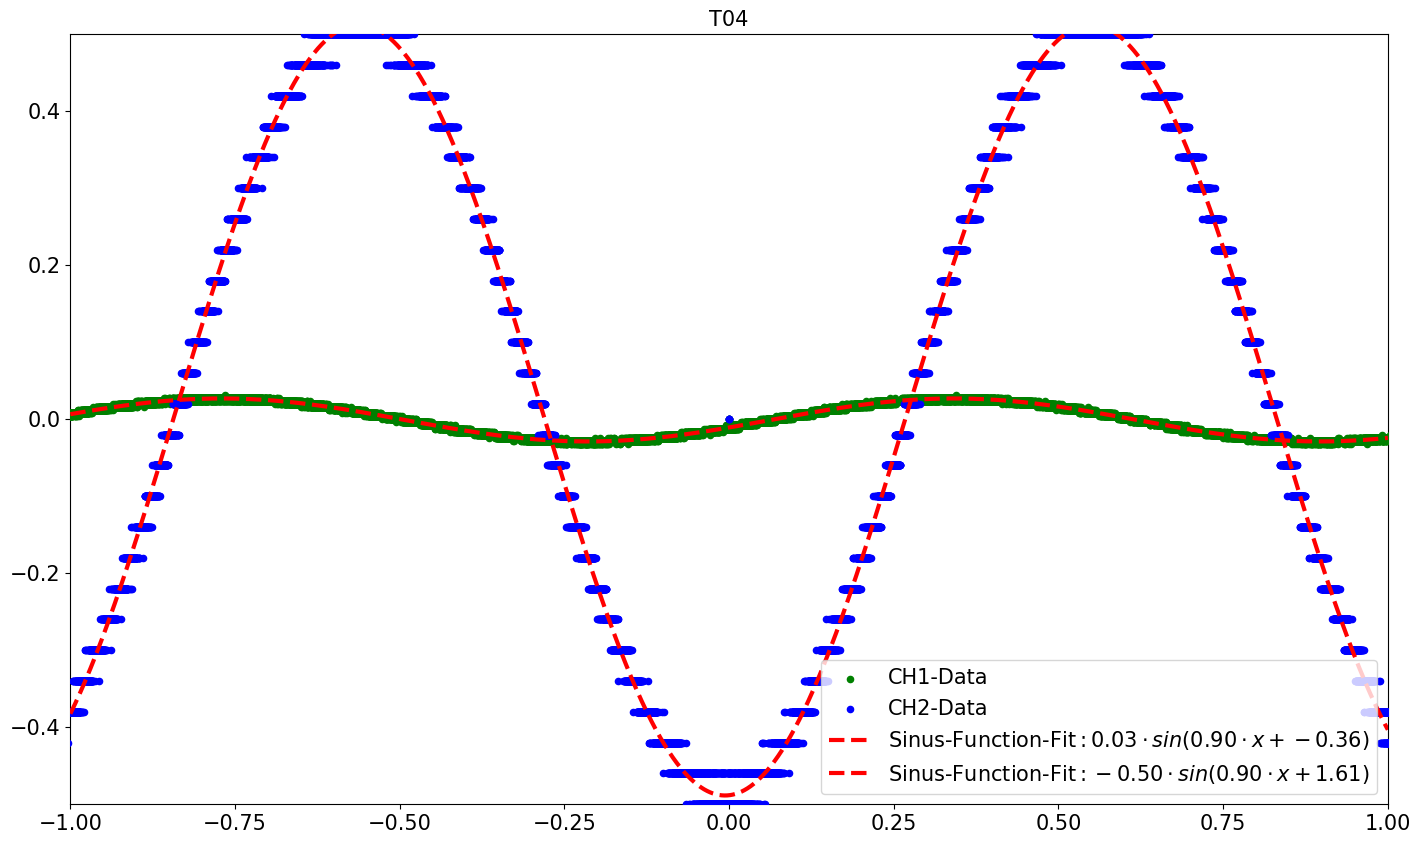

T05
Fitparameter
[ 0.03070705  0.82002153 -0.46480596 -0.00124915]
zugehörige Uncertainty
[6.08639519e-06 1.06945445e-05 1.96094994e-04 4.28346108e-06]
Fitparameter
[-0.50039021  0.82005045  0.91171364  0.01506081]
zugehörige Uncertainty
[6.41899491e-05 7.14824281e-06 1.28857506e-04 4.55747745e-05]


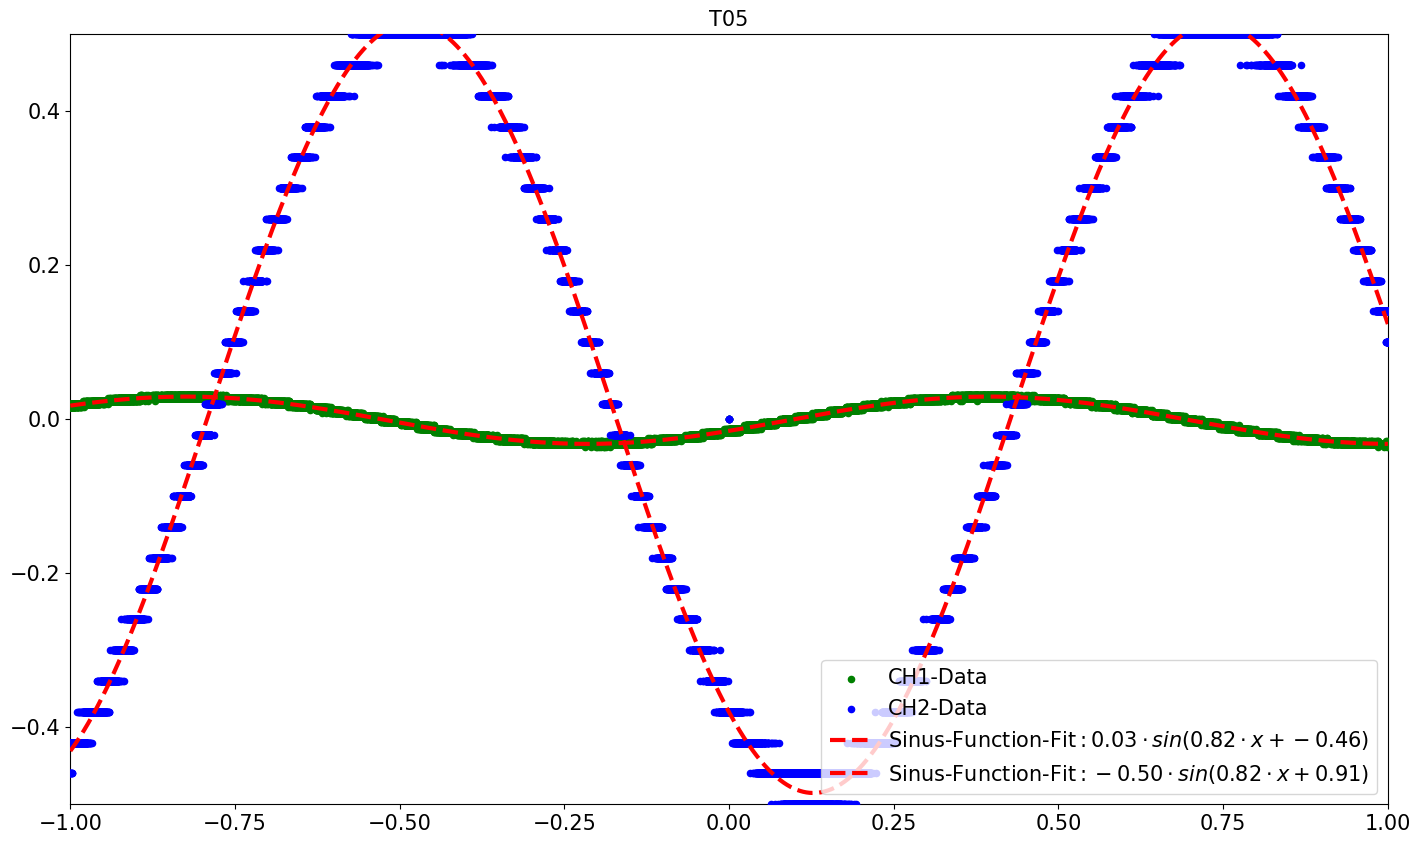

T06
Fitparameter
[ 0.03070705  0.82002153 -0.46480596 -0.00124915]
zugehörige Uncertainty
[6.08639519e-06 1.06945445e-05 1.96094994e-04 4.28346108e-06]
Fitparameter
[-0.50039021  0.82005045  0.91171364  0.01506081]
zugehörige Uncertainty
[6.41899491e-05 7.14824281e-06 1.28857506e-04 4.55747745e-05]


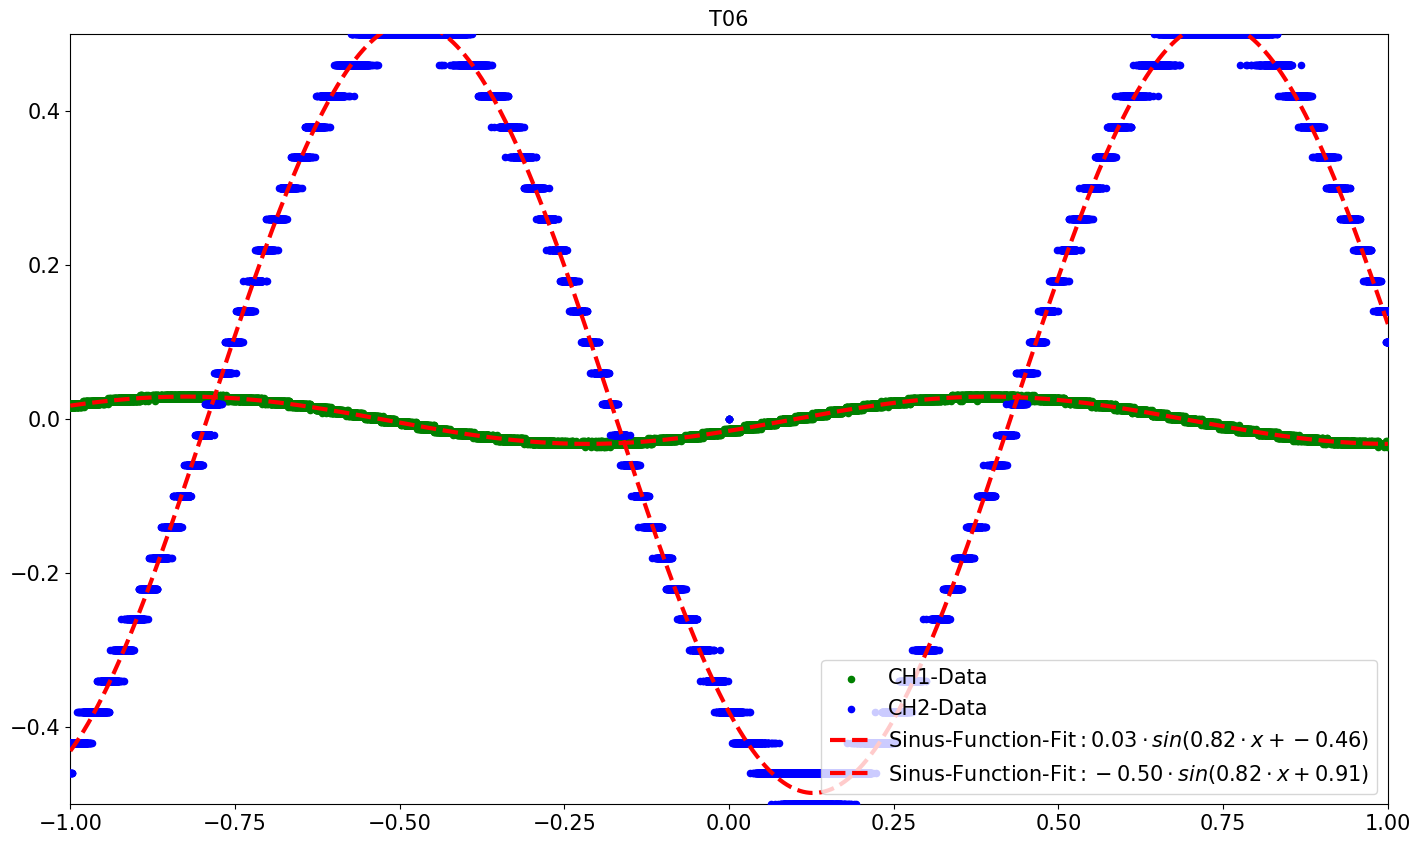

T07
Fitparameter
[ 0.0299915   0.79998039 -0.47954312 -0.00108767]
zugehörige Uncertainty
[6.14721951e-06 1.13098133e-05 2.05010656e-04 4.35034108e-06]
Fitparameter
[-0.50084708  0.80005081  0.75468647  0.01481346]
zugehörige Uncertainty
[6.40532153e-05 7.07063313e-06 1.27964621e-04 4.53934210e-05]


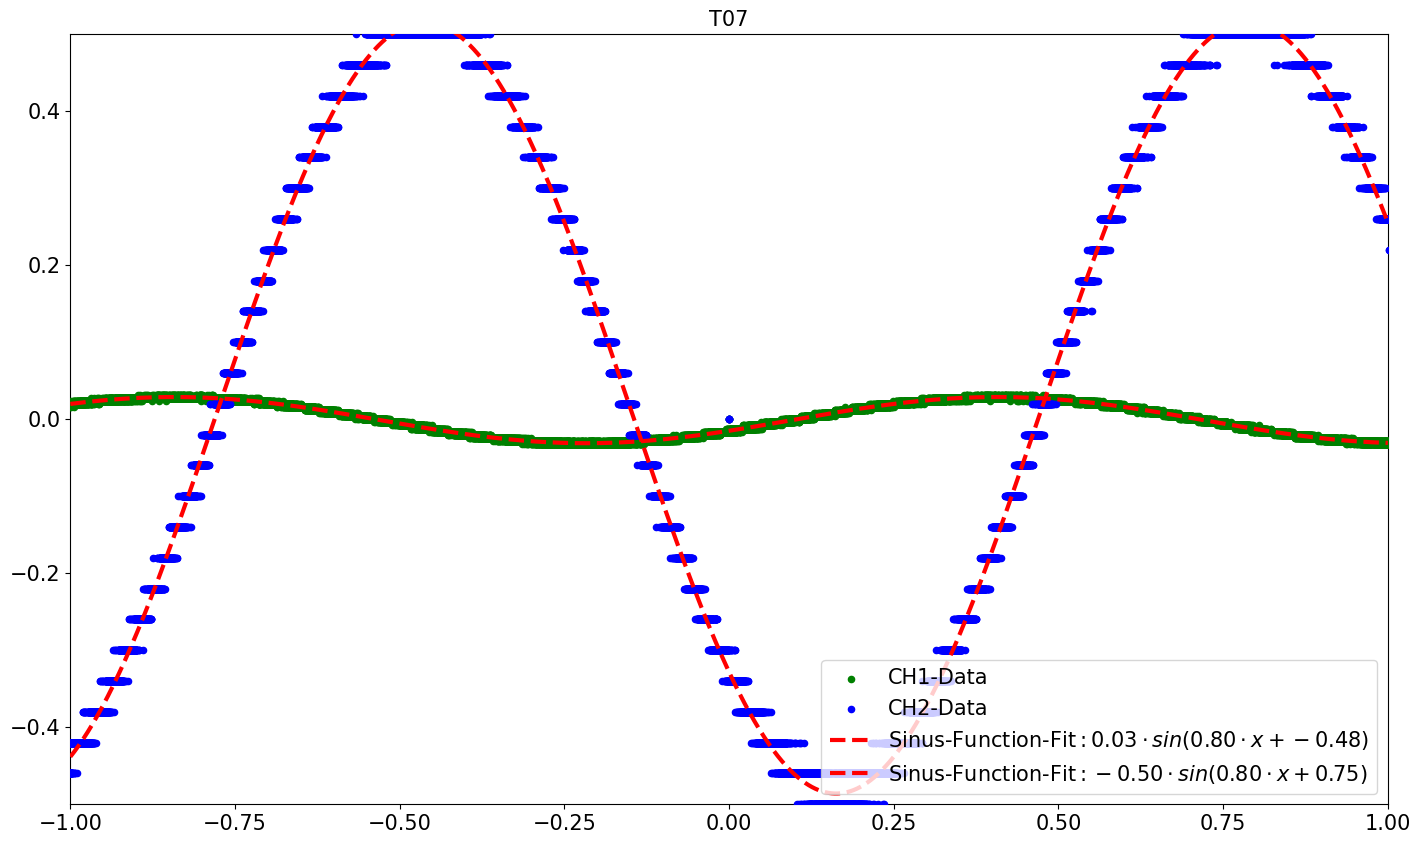

T09
Fitparameter
[ 0.01389689  0.49993468  0.4211461  -0.0007571 ]
zugehörige Uncertainty
[6.31500793e-06 2.50810111e-05 4.54534417e-04 4.47162708e-06]
Fitparameter
[-0.49980011  0.49993932  0.74298288  0.0106412 ]
zugehörige Uncertainty
[6.34618359e-05 7.04914176e-06 1.27168161e-04 4.51263110e-05]


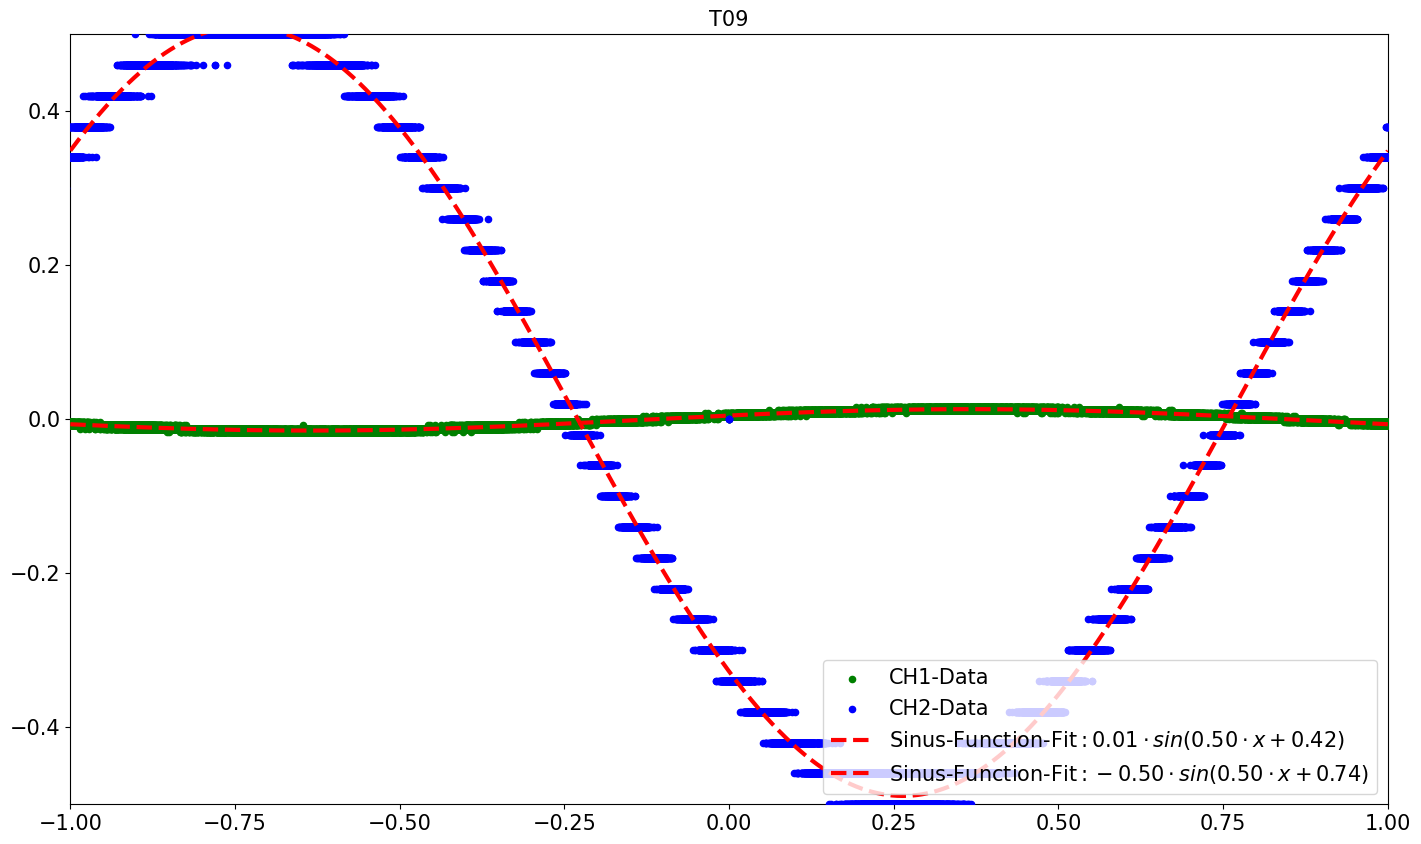

T10
Fitparameter
[ 0.01859996  0.99999417 -0.10794149 -0.00102177]
zugehörige Uncertainty
[6.23525755e-06 1.84714340e-05 3.35116476e-04 4.40756953e-06]
Fitparameter
[0.50017505 1.00001638 5.49103815 0.01291527]
zugehörige Uncertainty
[6.40668106e-05 7.07596486e-06 1.28138040e-04 4.53722426e-05]


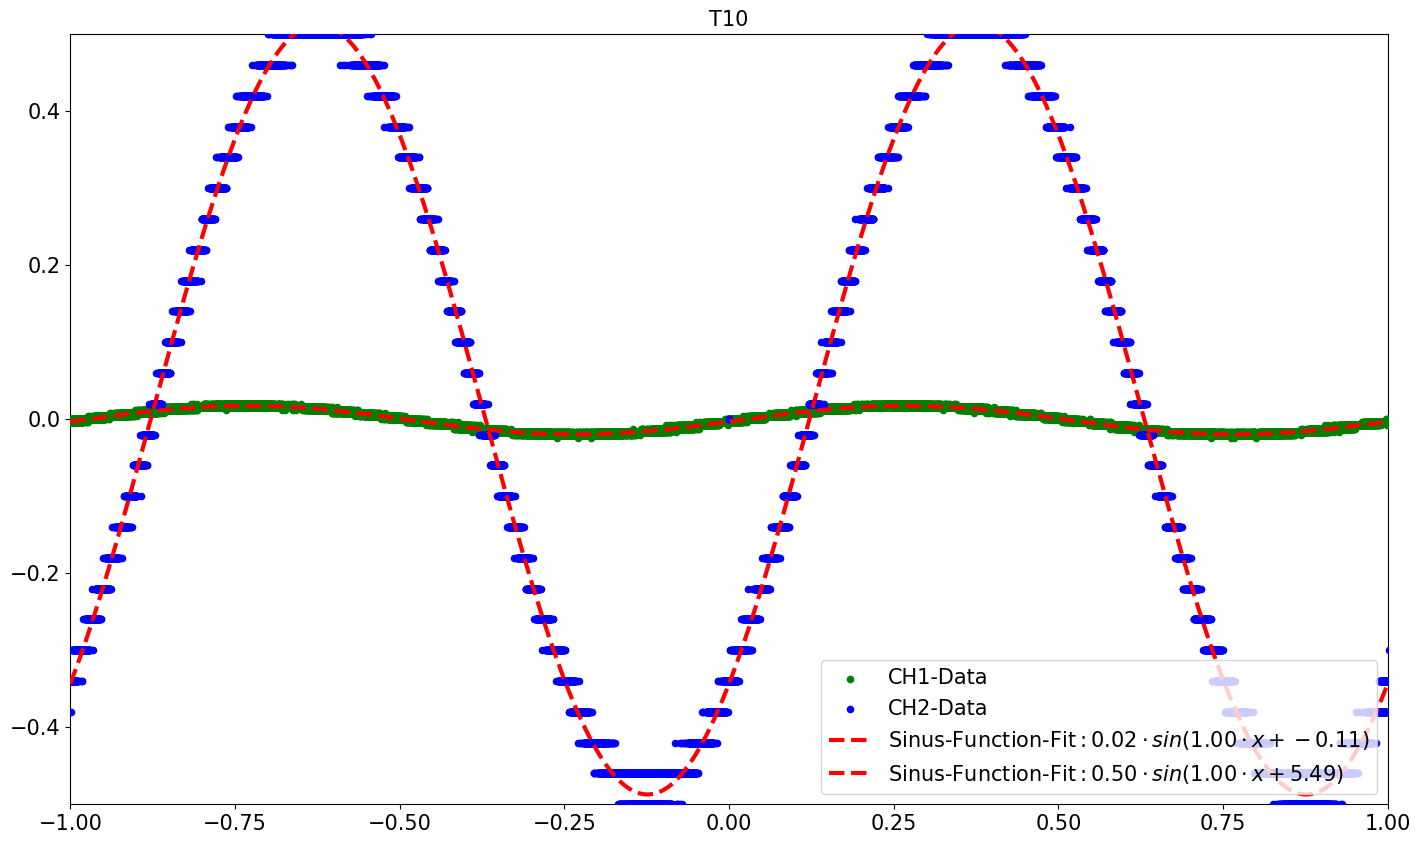

T11
Fitparameter
[ 0.01026184  0.24970318  0.62401891 -0.00120388]
zugehörige Uncertainty
[6.00698967e-06 3.23717896e-05 5.90950455e-04 4.29031871e-06]
Fitparameter
[-0.49927448  0.25000293  0.75149676  0.0136228 ]
zugehörige Uncertainty
[6.40765971e-05 7.07083584e-06 1.29225938e-04 4.57090706e-05]


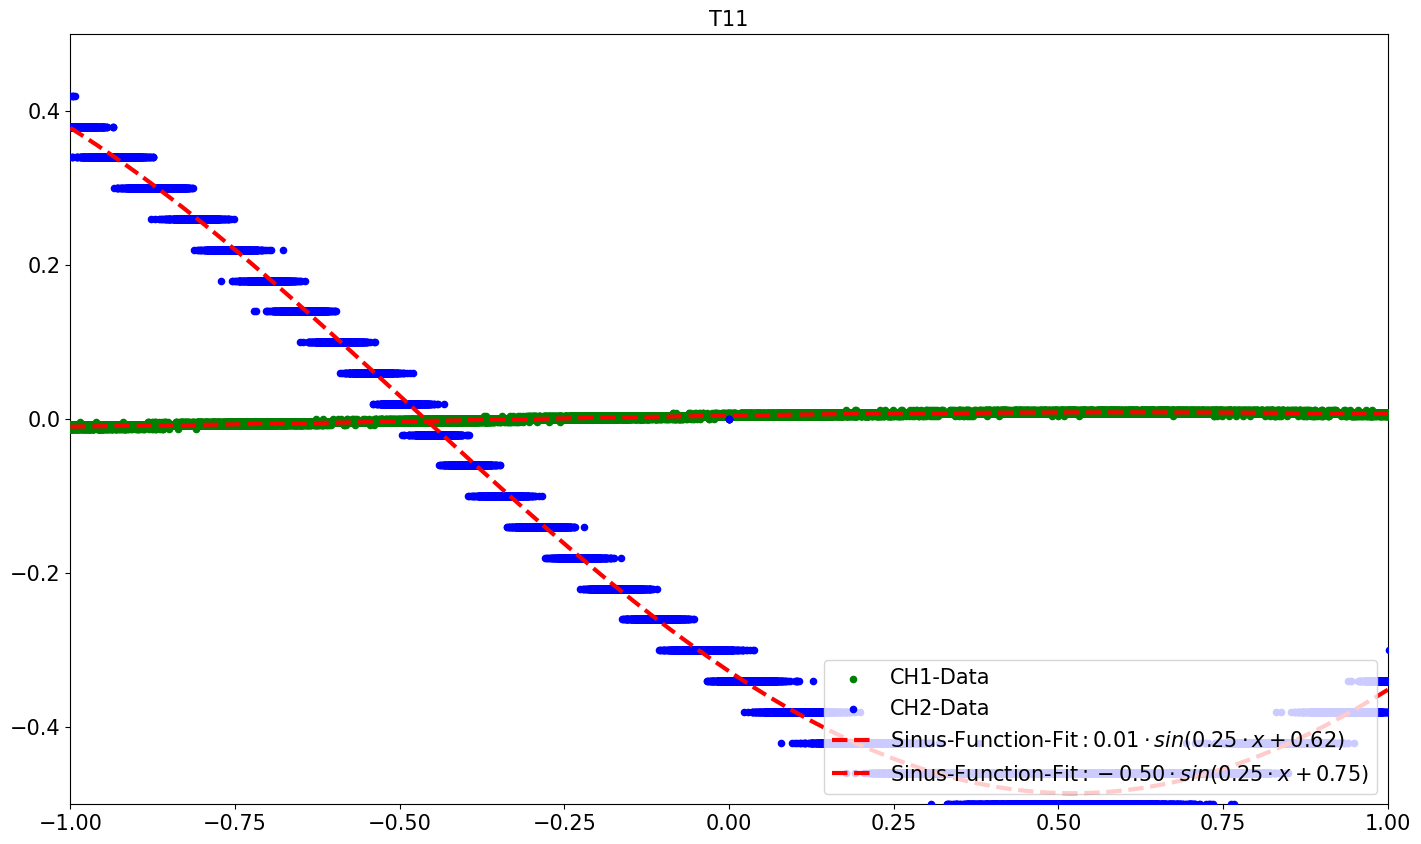

T12
Fitparameter
[ 7.57747481e-03  1.25006390e+00  2.09220758e+00 -1.47256637e-03]
zugehörige Uncertainty
[6.13610092e-06 4.46224831e-05 8.09615165e-04 4.33932057e-06]
Fitparameter
[0.50115212 1.24999605 1.84432501 0.01109599]
zugehörige Uncertainty
[6.40752371e-05 7.04320516e-06 1.27777663e-04 4.53034380e-05]


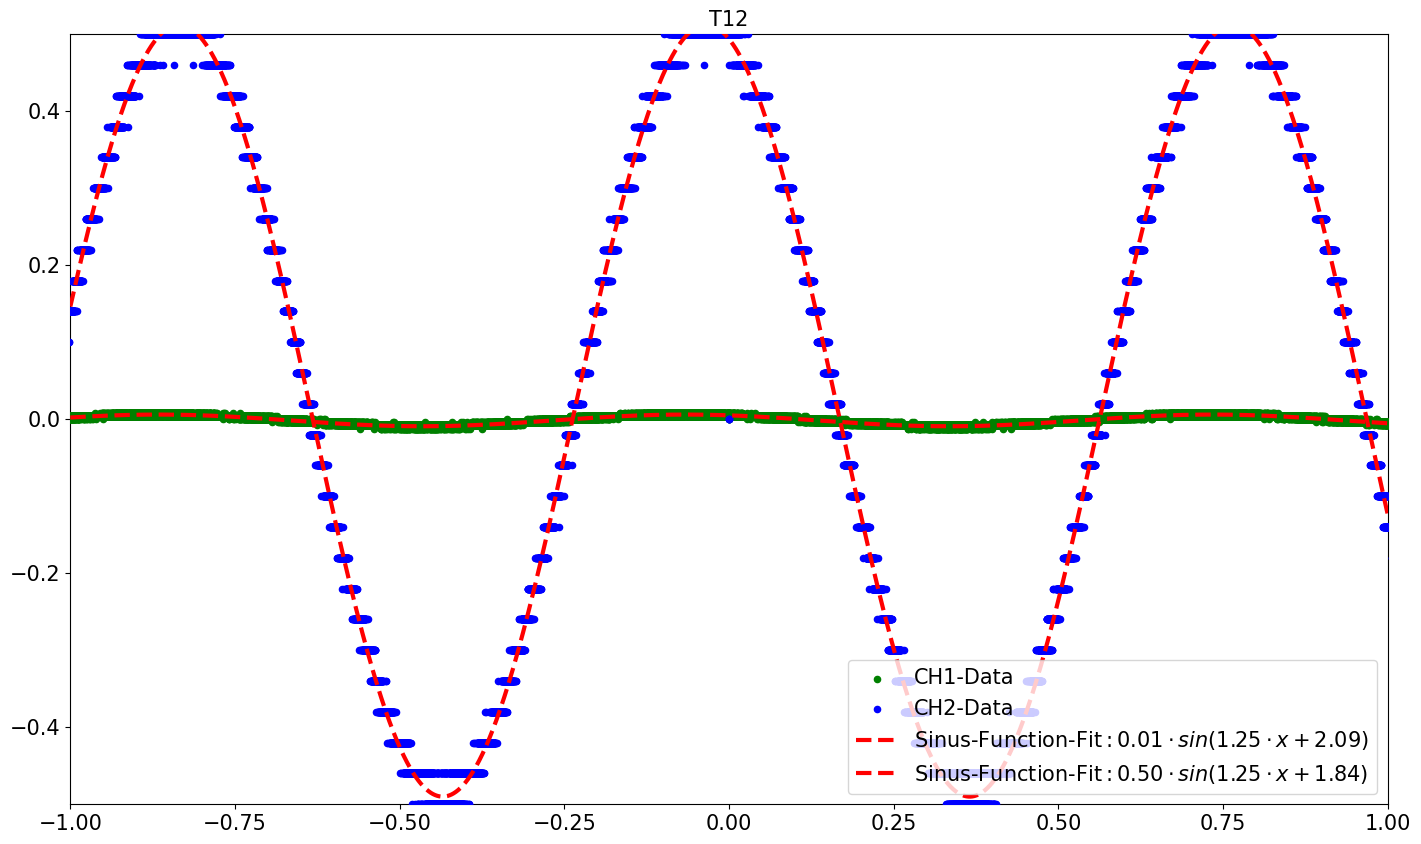

In [74]:
[t_T01, ch1_T01, ch2_T01] = read_oscilloscope_csv_data('T0001B.CSV')
[t_T02, ch1_T02, ch2_T02] = read_oscilloscope_csv_data('T0002B.CSV')
[t_T03, ch1_T03, ch2_T03] = read_oscilloscope_csv_data('T0003B.CSV')
[t_T04, ch1_T04, ch2_T04] = read_oscilloscope_csv_data('T0004B.CSV')
[t_T05, ch1_T05, ch2_T05] = read_oscilloscope_csv_data('T0005B.CSV')
[t_T06, ch1_T06, ch2_T06] = read_oscilloscope_csv_data('T0006B.CSV')
[t_T07, ch1_T07, ch2_T07] = read_oscilloscope_csv_data('T0007B.CSV')
[t_T09, ch1_T09, ch2_T09] = read_oscilloscope_csv_data('T0009B.CSV')
[t_T10, ch1_T10, ch2_T10] = read_oscilloscope_csv_data('T0010B.CSV')
[t_T11, ch1_T11, ch2_T11] = read_oscilloscope_csv_data('T0011B.CSV')
[t_T12, ch1_T12, ch2_T12] = read_oscilloscope_csv_data('T0012B.CSV')


print('T01')
plt.subplots(1,1,figsize=(17, 10));
plt.scatter(t_T01, ch1_T01, label = 'CH1-Data', color='green', s=20, zorder= 5)
plt.scatter(t_T01, ch2_T01, label = 'CH2-Data', color='blue', s=20, zorder= 5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T01, ch1_T01, 100000, [1, 0.9, 1, 1])
pars1a = pars
std1a = stdevs
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T01, ch2_T01, 100000, [1, 0.9, 1, 1])
pars1b = pars
std1b = stdevs
plt.plot(xfit, yfit, '--', color='red', label = r'Sinus-Function-Fit$: %.2f \cdot sin( 2\pi\cdot %.2f \cdot x + %.2f)$' %(pars[0], pars[1], pars[2]), zorder= 6, linewidth=3)

# Add axis labels and a title
plt.title('T01', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc = 'lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5]) #Achsenanpassung
plt.show()


print('T02')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T02, ch1_T02, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T02, ch2_T02, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T02, ch1_T02, 100000, [1, 0.9, 1, 1])
pars2a = pars
std2a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T02, ch2_T02, 100000, [1, 0.9, 1, 1])
pars2b = pars
std2b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T02', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T03')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T03, ch1_T03, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T03, ch2_T03, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T03, ch1_T03, 100000, [1, 0.9, 1, 1])
pars3a = pars
std3a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T03, ch2_T03, 100000, [1, 0.9, 1, 1])
pars3b = pars
std3b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T03', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T04')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T04, ch1_T04, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T04, ch2_T04, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T04, ch1_T04, 100000, [1, 0.9, 1, 1])
pars4a = pars
std4a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T04, ch2_T04, 100000, [1, 0.9, 1, 1])
pars4b = pars
std4b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T04', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T05')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T05, ch1_T05, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T05, ch2_T05, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T05, ch1_T05, 100000, [1, 0.9, 1, 1])
pars5a = pars
std5a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T05, ch2_T05, 100000, [1, 0.9, 1, 1])
pars5b = pars
std5b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T05', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T06')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T06, ch1_T06, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T06, ch2_T06, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T06, ch1_T06, 100000, [1, 0.9, 1, 1])
pars6a = pars
std6a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T06, ch2_T06, 100000, [1, 0.9, 1, 1])
pars6b = pars
std6b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T06', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T07')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T07, ch1_T07, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T07, ch2_T07, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T07, ch1_T07, 100000, [1, 0.8, 1, 1])
pars7a = pars
std7a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T07, ch2_T07, 100000, [1, 0.8, 1, 1])
pars7b = pars
std7b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T07', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T09')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T09, ch1_T09, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T09, ch2_T09, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T09, ch1_T09, 100000, [1, 0.5, 1, 1])
pars9a = pars
std9a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T09, ch2_T09, 100000, [1, 0.5, 1, 1])
pars9b = pars
std9b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T09', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T10')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T10, ch1_T10, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T10, ch2_T10, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T10, ch1_T10, 100000, [1, 1, 1, 1])
pars10a = pars
std10a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T10, ch2_T10, 100000, [1, 1, 1, 1])
pars10b = pars
std10b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T10', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T11')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T11, ch1_T11, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T11, ch2_T11, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T11, ch1_T11, 100000, [1, 0.3, 1, 1])
pars11a = pars
std11a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T11, ch2_T11, 100000, [1, 0.3, 1, 1])
pars11b = pars
std11b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T11', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()

print('T12')
plt.subplots(1, 1, figsize=(17, 10))
plt.scatter(t_T12, ch1_T12, label='CH1-Data', color='green', s=20, zorder=5)
plt.scatter(t_T12, ch2_T12, label='CH2-Data', color='blue', s=20, zorder=5)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T12, ch1_T12, 100000, [1, 1.2, 1, 1])
pars12a = pars
std12a = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten(sinusfunct, t_T12, ch2_T12, 100000, [1, 1.2, 1, 1])
pars12b = pars
std12b = stdevs
plt.plot(xfit, yfit, '--', color='red', label=r'Sinus-Function-Fit$: %.2f \cdot sin( %.2f \cdot x + %.2f)$' % (pars[0], pars[1], pars[2]), zorder=6, linewidth=3)

# Add axis labels and a title
plt.title('T12', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15, loc='lower right').set_zorder(102)
plt.axis([-1, 1, -0.5, 0.5])  # Achsenanpassung
plt.show()






In [75]:

values2 = np.array([pars1a, pars1b, pars2a, pars2b, pars3a, pars3b, pars4a, pars4b, pars5a, pars5b, pars6a, pars6b, pars7a, pars7b, pars9a, pars9b, pars10a, pars10b, pars11a, pars11b, pars12a, pars12b])

unc2 = np.array([std1a, std1b, std2a, std2b, std3a, std3b, std4a, std4b, std5a, std5b, std6a, std6b, std7a, std7b, std9a, std9b, std10a, std10b, std11a, std11b, std12a, std12b])

uarray2 = unp.uarray( values2, unc2)
print(uarray2)

[[0.029492635187857517+/-6.109070413516755e-06
  0.8799597295705729+/-1.1648082056786212e-05
  -0.4877104919898648+/-0.0002092013604613317
  -0.0010959684997106686+/-4.344222499753609e-06]
 [-0.4991382675712393+/-6.427411262581232e-05
  0.8799819335198386+/-6.903624748426628e-06
  1.338722543265466+/-0.0001267498001976649
  0.01244973919577993+/-4.520719321478714e-05]
 [0.030494676275116067+/-6.04471934263577e-06
  0.8600409208110915+/-1.1078661914048411e-05
  -0.4642617606429285+/-0.00019967735539794997
  -0.0012585396126589573+/-4.292101319073353e-06]
 [-0.5009531762789223+/-6.474467465972597e-05
  0.8599773525373744+/-7.00304772201729e-06
  1.2136717054986939+/-0.00012806938318354752
  0.012597021088171382+/-4.5610334513013045e-05]
 [0.031021037592230988+/-6.134316550851249e-06
  0.8399723280273106+/-1.076735815178998e-05
  -0.47183274946666964+/-0.00019662512367094802
  -0.001134942366702738+/-4.327401645446818e-06]
 [-0.5003020615193942+/-6.418636372408453e-05
  0.8400032911329041

In [76]:
v = np.array([])
i = 0
while i <= 21:
  if uarray2[i][0] > 0:
    v1 = uarray2[i][2]
  if uarray2[i][0] < 0:
    v1 = uarray2[i][2]- np.pi
  if uarray2[i+1][0] > 0:
    v2 = uarray2[i+1][2]
  if uarray2[i+1][0] < 0:
    v2 = uarray2[i+1][2]- np.pi
  i = i+2
  v = np.append(v, v2-v1)
  v = np.append(v, 0)
print(v)

# Add a new axis to the 1D array
new_column_array = np.array([])
new_column_array = v[:, np.newaxis]

# Concatenate the arrays horizontally
new = np.array([])
new = np.column_stack((uarray2, v))
print(new)

d_koff = d1/omega0
print('d_koff:', d_koff)

values = np.random.random((11, 3))

# Create an array of uncertainties
uncertainties = np.random.random((11, 3)) * 0.1

# Create a uarray with the nominal values and uncertainties
end = unp.uarray(values, uncertainties)
i= 0
while i <= 21:
  j = i//2
  eta = new[i][1]*2*np.pi/omega0
  end[j][0] = new[i][0]
  end[j][1] = new[i][4]
  end[j][2] = eta
  i = i+2

print(end)

[-1.3151596183344623+/-0.00024460319104422984 0
 -1.4636591874481708+/-0.00023721891401769284 0
 -1.6172485924141178+/-0.00023514546864109595 0
 -1.1780009222969945+/-0.00025426543679990803 0
 -1.7650730535880206+/-0.00023464335406239362 0
 -1.7650730535880206+/-0.00023464335406239362 0
 -1.907363071282797+/-0.00024166984402647945 0
 -2.819755873879559+/-0.0004719886415344819 0
 5.598979636252256+/-0.0003587790540142246 0
 -3.014114804343171+/-0.0006049146914433866 0
 -0.2478825750356637+/-0.0008196364110188495 0]
[[0.029492635187857517+/-6.109070413516755e-06
  0.8799597295705729+/-1.1648082056786212e-05
  -0.4877104919898648+/-0.0002092013604613317
  -0.0010959684997106686+/-4.344222499753609e-06
  -1.3151596183344623+/-0.00024460319104422984]
 [-0.4991382675712393+/-6.427411262581232e-05
  0.8799819335198386+/-6.903624748426628e-06
  1.338722543265466+/-0.0001267498001976649
  0.01244973919577993+/-4.520719321478714e-05 0]
 [0.030494676275116067+/-6.04471934263577e-06
  0.8600409208

Fitparameter
[0.00945051 0.0237802 ]
zugehörige Uncertainty
[4.41501160e-05 2.47914308e-04]


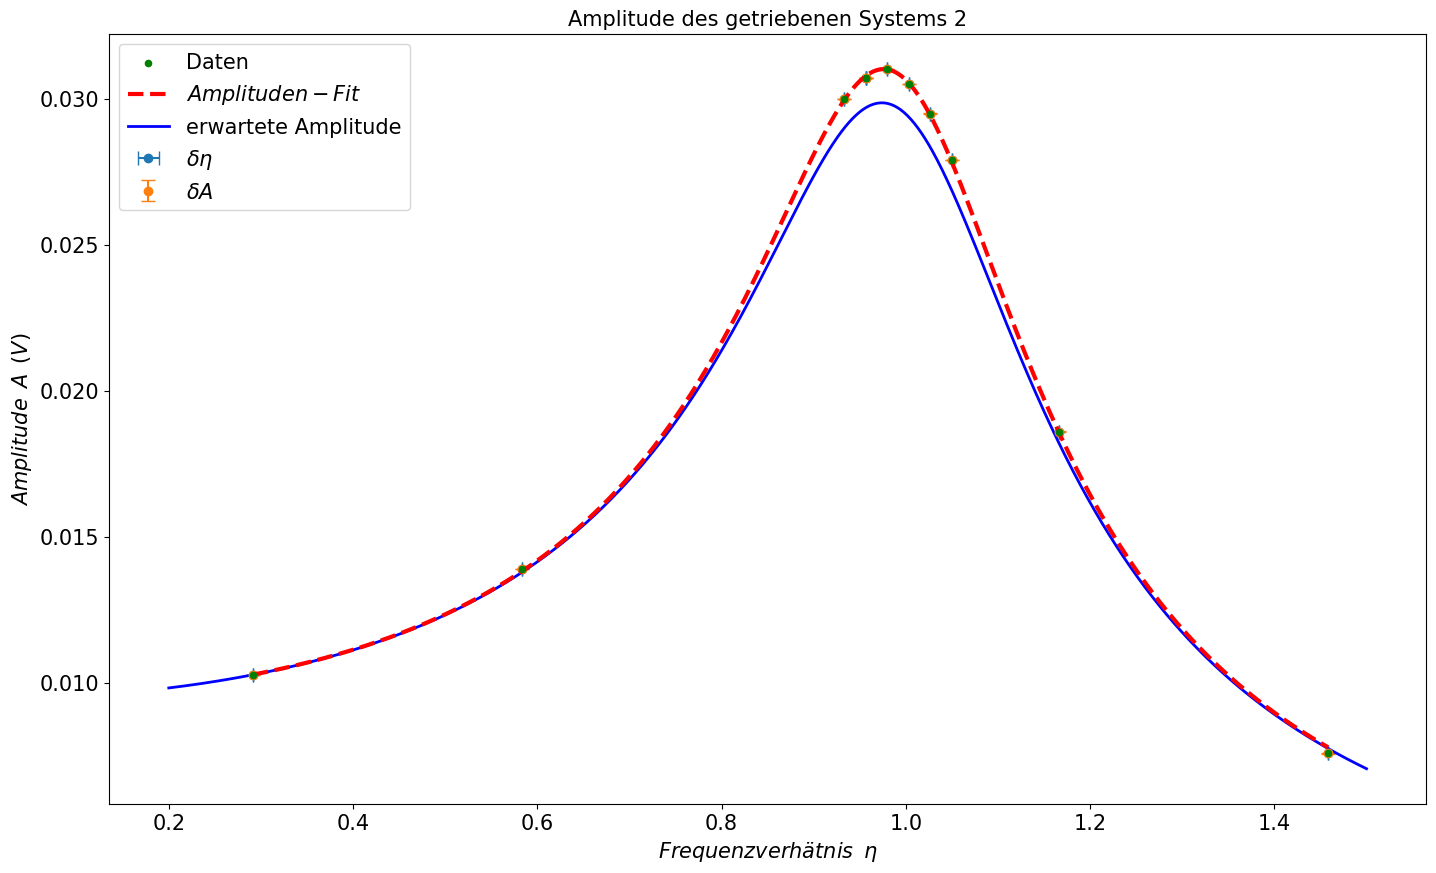

In [77]:
plt.subplots(1,1,figsize=(17, 10));

x = [float(i[2].nominal_value) for i in end]
y = [float(i[0].nominal_value) for i in end]

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i[2].std_dev) for i in end]
y_error = [float(i[0].std_dev) for i in end]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δ\eta$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δA$')


pars, stdevs, xfit, yfit = daten_fitten(quatschfunktion, x, y, 100000, [1, 9e-4])
plt.plot(xfit, yfit, '--', color='red', label=r'$Amplituden-Fit$', zorder=4, linewidth=3)

x = np.linspace(0.2, 1.5, 1000)

a=pars[0]
d=np.power(d_koff2.nominal_value,2)

y = quatschfunktion(x, a, d)

plt.plot(x, y, label=r'erwartete Amplitude', color='blue', linewidth=2 )


# Add axis labels and a title
plt.xlabel(r'$Frequenzverhätnis \enspace \eta$', fontsize=15)
plt.ylabel(r'$Amplitude \enspace A \enspace (V)$', fontsize=15)
plt.title('Amplitude des getriebenen Systems 2', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

<ipython-input-62-367d2dd27b23>:79: RuntimeWarning: divide by zero encountered in true_divide
  return np.arctan(2*a*x/(1-np.power(x,2)))-np.pi


Fitparameter
[0.20561071]
zugehörige Uncertainty
[0.47723461]
Fitparameter
[0.11590685]
zugehörige Uncertainty
[0.23504556]


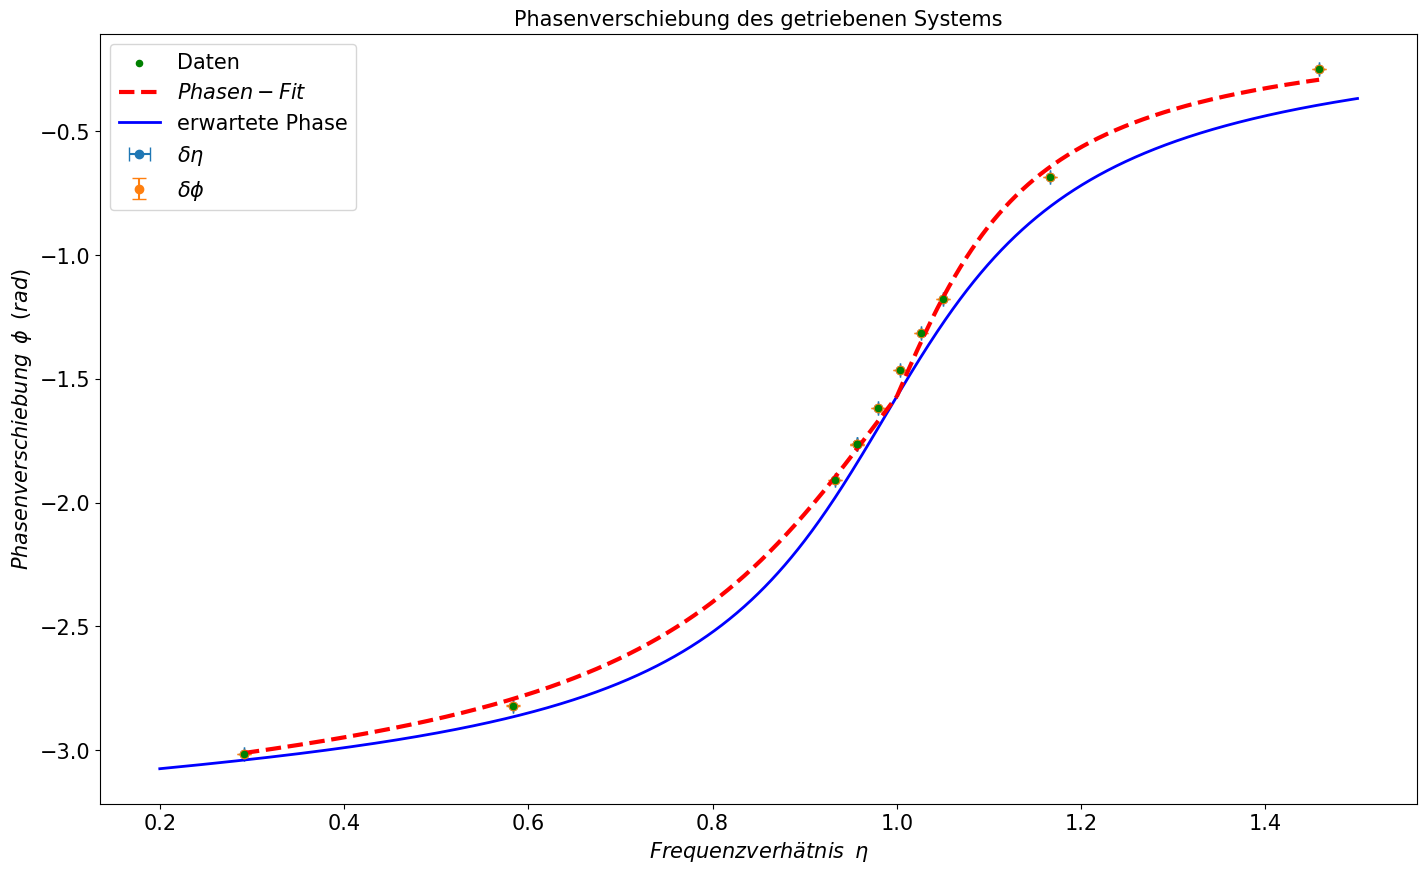

In [78]:
plt.subplots(1,1,figsize=(17, 10));

x = [float(i[2].nominal_value) for i in end]
y = [float(i[1].nominal_value) for i in end]
y[8] = y[8]-2*np.pi

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

x_error = [float(i[2].std_dev) for i in end]
y_error = [float(i[1].std_dev) for i in end]

plt.errorbar(x, y, xerr=x_error, fmt='o', capsize=5, label = r'$δ\eta$')
plt.errorbar(x, y, yerr=y_error, fmt='o', capsize=5, label = r'$δ\phi$')

indicesXD = [index for index, value in enumerate(x) if value < 1]
indicesXU = [index for index, value in enumerate(x) if value > 1]

x1 = [x[index] for index in indicesXD]
y1 = [y[index] for index in indicesXD]
x1 = np.append(x1, 1)
y1 = np.append(y1, np.pi/2)

pars, stdevs, xfit, yfit = daten_fitten(ekeltan, x1, y1, 100000, [1])
plt.plot(xfit, yfit, '--', color='red', label=r'$Phasen-Fit$', zorder=4, linewidth=3)

x_line = np.linspace(0.2, 0.9999999, 1000)

a=d_koff2

y_line = ekeltan(x_line, a.nominal_value)

plt.plot(x_line, y_line, label=r'erwartete Phase', color='blue', linewidth=2 )

x2 = [x[index] for index in indicesXU]
y2 = [y[index] for index in indicesXU]
x2 = np.append(x2, 1.0000001)
y2 = np.append(y2, np.pi/2)


pars, stdevs, xfit, yfit = daten_fitten(ekeltan2, x2, y2, 100000, [1])
plt.plot(xfit, yfit, '--', color='red', zorder=4, linewidth=3)

x_line = np.linspace(1.0000001, 1.5, 1000)

a=d_koff2

y_line = ekeltan2(x_line, a.nominal_value)

plt.plot(x_line, y_line, color='blue', linewidth=2 )

# Add axis labels and a title
plt.xlabel(r'$Frequenzverhätnis \enspace \eta$', fontsize=15)
plt.ylabel(r'$Phasenverschiebung \enspace \phi \enspace (rad)$', fontsize=15)
plt.title('Phasenverschiebung des getriebenen Systems', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
plt.show()

In [79]:
[t, ch1, ch2] = read_oscilloscope_csv_data3('T0001ALL.CSV')
plt.subplots(1,1,figsize=(17, 10));

x = ch1
y = ch2

plt.scatter(x, y, label = 'Daten', color='green', s=20, zorder= 5)

# Add axis labels and a title
plt.xlabel(r'$Amplitude \enspace A \enspace (V)$', fontsize=15)
plt.ylabel(r'$Winkelgeschwindigkeit \enspace \dot{\phi} \enspace (V)$', fontsize=15)
plt.title('Phasendiagramm', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(loc = 'upper left', fontsize=15)
plt.show()

FileNotFoundError: ignored